In [1]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from sklearn.datasets import make_blobs # type:ignore
from scipy.stats import multivariate_normal # type:ignore
from sklearn.metrics import confusion_matrix,classification_report # type:ignore
from scipy.optimize import linear_sum_assignment # type:ignore
from matplotlib.lines import Line2D # type:ignore
from sklearn.preprocessing import StandardScaler # type:ignore
from sklearn.decomposition import PCA # type:ignore
from sklearn.manifold import TSNE # type:ignore
import umap # type:ignore
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering # type:ignore
from sklearn.mixture import GaussianMixture # type:ignore
from sklearn.neighbors import NearestNeighbors # type:ignore
import kmedoids # type:ignore
from pyclustering.cluster.kmedoids import kmedoids # type:ignore
from pyclustering.utils import distance_metric,type_metric # type:ignore
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score # type:ignore 
import warnings # type:ignore
warnings.filterwarnings("ignore",category=UserWarning) # type:ignore
from main import CorrelatedClusterGenerator

# data

In [2]:
np.random.seed(42)

In [3]:
cluster_generator = CorrelatedClusterGenerator(n_samples=100000,n_features=20,n_clusters=3,correlation=0.8,random_state=42,cluster_std=[1.0, 5.5, 0.5],separation_factor=3.0)

In [4]:
X, y, centers = cluster_generator.generate_clusters()

In [5]:
X = X + np.random.normal(scale=3,size=X.shape) 

In [6]:
X = np.vstack(
    (X[y == 0][:5000], X[y == 1][:3500], X[y == 2][:1500])
)  

In [7]:
y = [0] * 5000 + [1] * 3500 + [2] * 1500

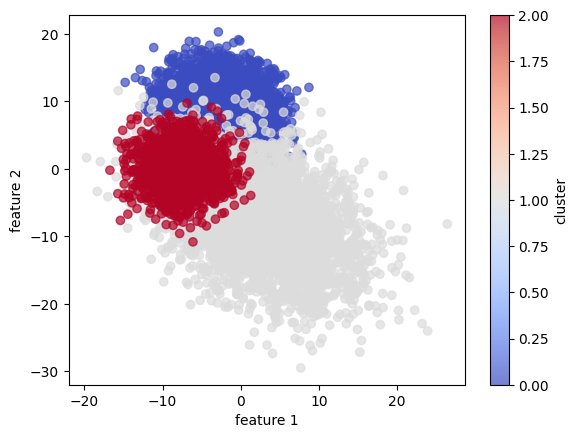

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

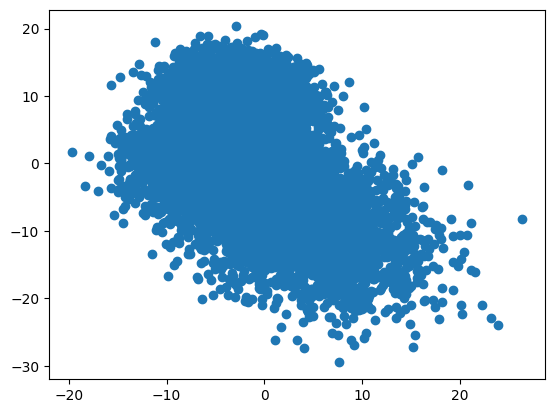

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [10]:
corr_dataset = pd.DataFrame(X) 

In [11]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [12]:
corr_dataset['target'] = y

In [13]:
corr_dataset

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...     vab_12    vab_13  \
0    -9.681095  8.976868  5.850745   2.738370  ...   7.930266  8.857610   
1    -6.537101  7.721109  0.792942  10.815044  ...   6.238066  5.453240   
2    -9.646157  8.110650  0.919857   9.483313  ...  10.370689  6.609828   
3    -5.758030  1.033838 -1.041019   6.091147  ...  16.374520  9.407202   
4    -6.615850  5.314052  5.825007   0.733887  ...  11.002575  3.077253   
...        ...       ...       ...        ...  ...        ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...   2.652799  7.673091   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...   1.083532  7.746132   
9997 -1.827792  5.803480  3.119384  -5.109602  ...   3.788252  9.142960   
9998 -5.791254  0.591293  0.633621  -8.321554  ...   1.763164  8.014670   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  11.646228  8.982281   

        vab_14    vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  \
0    -3.582936 -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444   
1    -6.073380 -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936   
2    -8.373270  0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338   
3    -0.287553 -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719   
4    -9.004935 -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451   
...        ...       ...        ...       ...        ...        ...       ...   
9995  8.961893  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761   
9996  0.425229  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848   
9997  7.585068  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068   
9998  9.690668  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251   
9999  5.295816  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9995       2  
9996       2  
9997       2  
9998       2  
9999       2  

[10000 rows x 21 columns]

In [14]:
# sns.pairplot(corr_dataset)

## correlation matrix

In [15]:
corr_dataset.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.428027 -0.064575 -0.448533  0.359952  0.355831 -0.173698   
vab_2  -0.428027  1.000000  0.565861  0.306537 -0.529980 -0.788886 -0.146916   
vab_3  -0.064575  0.565861  1.000000 -0.045452 -0.372082 -0.604529 -0.210974   
vab_4  -0.448533  0.306537 -0.045452  1.000000 -0.310618 -0.222507  0.119392   
vab_5   0.359952 -0.529980 -0.372082 -0.310618  1.000000  0.521574 -0.059259   
vab_6   0.355831 -0.788886 -0.604529 -0.222507  0.521574  1.000000  0.100254   
vab_7  -0.173698 -0.146916 -0.210974  0.119392 -0.059259  0.100254  1.000000   
vab_8  -0.271744  0.629582  0.483993  0.131949 -0.436671 -0.643518 -0.040459   
vab_9   0.008185  0.057059  0.072476 -0.065954 -0.032139 -0.069326 -0.018819   
vab_10 -0.181913  0.660160  0.559355  0.118268 -0.321256 -0.592010 -0.365719   
vab_11 -0.166800 -0.483731 -0.603728  0.140836  0.174444  0.493723  0.463607   
vab_12 -0.343534  0.691978  0.393365  0.337732 -0.435614 -0.597069 -0.233177   
vab_13 -0.611894  0.727550  0.316835  0.512437 -0.531192 -0.641936  0.031321   
vab_14  0.088591 -0.664972 -0.621972 -0.121128  0.337945  0.622463  0.370228   
vab_15  0.174352 -0.644116 -0.478086 -0.213318  0.331448  0.547527  0.375329   
vab_16  0.022708 -0.595554 -0.629350 -0.024397  0.314109  0.590036  0.332518   
vab_17  0.388878 -0.140626  0.082294 -0.283439  0.219055  0.135763 -0.327495   
vab_18 -0.011163  0.436119  0.387640  0.063141 -0.196539 -0.402305 -0.378236   
vab_19  0.295947 -0.199873  0.159449 -0.380294  0.079183  0.063618  0.021449   
vab_20  0.077621 -0.221052 -0.114012 -0.127431  0.120657  0.142603  0.081546   

           vab_8     vab_9    vab_10    vab_11    vab_12    vab_13    vab_14  \
vab_1  -0.271744  0.008185 -0.181913 -0.166800 -0.343534 -0.611894  0.088591   
vab_2   0.629582  0.057059  0.660160 -0.483731  0.691978  0.727550 -0.664972   
vab_3   0.483993  0.072476  0.559355 -0.603728  0.393365  0.316835 -0.621972   
vab_4   0.131949 -0.065954  0.118268  0.140836  0.337732  0.512437 -0.121128   
vab_5  -0.436671 -0.032139 -0.321256  0.174444 -0.435614 -0.531192  0.337945   
vab_6  -0.643518 -0.069326 -0.592010  0.493723 -0.597069 -0.641936  0.622463   
vab_7  -0.040459 -0.018819 -0.365719  0.463607 -0.233177  0.031321  0.370228   
vab_8   1.000000  0.028900  0.437760 -0.352122  0.414915  0.496377 -0.464083   
vab_9   0.028900  1.000000  0.066749 -0.084849 -0.026168  0.023965 -0.070789   
vab_10  0.437760  0.066749  1.000000 -0.674618  0.642330  0.487279 -0.714071   
vab_11 -0.352122 -0.084849 -0.674618  1.000000 -0.489126 -0.180105  0.719663   
vab_12  0.414915 -0.026168  0.642330 -0.489126  1.000000  0.691314 -0.667771   
vab_13  0.496377  0.023965  0.487279 -0.180105  0.691314  1.000000 -0.468006   
vab_14 -0.464083 -0.070789 -0.714071  0.719663 -0.667771 -0.468006  1.000000   
vab_15 -0.378166 -0.059135 -0.719759  0.674459 -0.731895 -0.545505  0.738239   
vab_16 -0.460533 -0.037881 -0.676037  0.726224 -0.557205 -0.367113  0.728349   
vab_17 -0.188397 -0.012038  0.144294 -0.373166 -0.012343 -0.305666 -0.174476   
vab_18  0.232543  0.038979  0.604333 -0.628912  0.540902  0.313582 -0.613303   
vab_19  0.066077  0.052344 -0.206856 -0.031592 -0.370745 -0.422029  0.142969   
vab_20 -0.110576 -0.016461 -0.270241  0.213141 -0.272862 -0.200469  0.212174   

          vab_15    vab_16    vab_17    vab_18    vab_19    vab_20  
vab_1   0.174352  0.022708  0.388878 -0.011163  0.295947  0.077621  
vab_2  -0.644116 -0.595554 -0.140626  0.436119 -0.199873 -0.221052  
vab_3  -0.478086 -0.629350  0.082294  0.387640  0.159449 -0.114012  
vab_4  -0.213318 -0.024397 -0.283439  0.063141 -0.380294 -0.127431  
vab_5   0.331448  0.314109  0.219055 -0.196539  0.079183  0.120657  
vab_6   0.547527  0.590036  0.135763 -0.402305  0.063618  0.142603  
vab_7   0.375329  0.332518 -0.327495 -0.378236  0.021449  0.081546  
vab_8  -0.378166 -0.460533 -0.188397  0.232543  0.066077 -0.110576  
vab_9  -0.059135 -0.037881 -

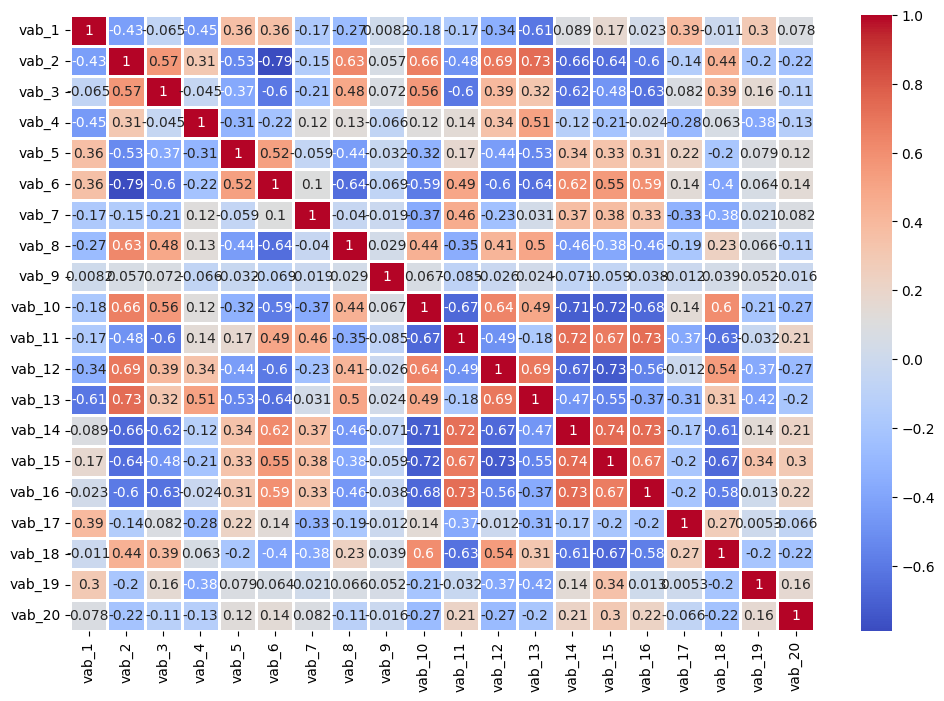

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='coolwarm',annot=True,linewidths=1)
plt.show()

## data standardization

In [17]:
X_values = corr_dataset.iloc[:,:-1].values

In [18]:
y_values = corr_dataset.iloc[:,-1].values

In [19]:
scaler = StandardScaler()

In [20]:
X_values = scaler.fit_transform(X_values)

In [21]:
np.mean(X_values),np.std(X_values)

(-8.171241461241152e-17, 0.9999999999999997)

In [22]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6   \
0    -0.147945  0.823216  0.782545  0.607874 -1.356490 -0.848240 -0.533131   
1    -0.096860  1.163833  0.676891  1.000164  0.000803 -0.001558  0.118489   
2     0.328597  1.112429  0.650647  0.023242 -1.598351 -1.144670 -0.525889   
3    -0.263594  1.391596 -0.010552 -0.431496 -1.239704 -0.941699  0.279958   
4     0.164797  1.127959  1.665437  0.280001 -0.504031 -1.020137  0.102167   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.193833 -0.166820 -1.755066  1.803317 -0.366897  0.319959  1.041904   
9996 -0.513267 -0.279727 -0.526557  0.583037  0.571862  0.795129  0.580622   
9997 -1.307452  0.042248 -1.420076  1.565540 -0.428621  0.606057  1.094533   
9998 -0.491774 -0.475198 -1.306215  0.869207  0.407418  1.055257  0.273072   
9999 -1.009624  0.277313 -1.538515  1.247149 -1.137599  0.147637 -0.463098   

            7         8         9         10        11        12        13  \
0     0.896490  0.914259  0.625068 -0.730866  0.552929  0.823132 -0.595476   
1     0.678370 -0.215967  1.686007 -0.378688  0.353103  0.439235 -0.890038   
2     0.746032 -0.187606  1.511073 -1.429265  0.841109  0.569659 -1.162062   
3    -0.483180 -0.625788  1.065483 -0.651740  1.550079  0.885108 -0.205708   
4     0.260274  0.908508  0.361762 -0.762193  0.915726  0.171304 -1.236773   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.159368  0.378206 -0.365061  1.390604 -0.070267  0.689559  0.888289   
9996 -1.268935  1.389022 -0.614464  1.347047 -0.255576  0.697795 -0.121402   
9997  0.345286  0.303904 -0.405830  0.845075  0.063814  0.855310  0.725442   
9998 -0.560048 -0.251569 -0.827747  1.248799 -0.175321  0.728077  0.974486   
9999 -0.375870  0.851436 -0.006558  1.459684  0.991733  0.837191  0.454676   

            14        15        16        17        18        19  
0    -1.127417 -0.692455  1.138642  1.137109 -0.561363  0.720426  
1    -0.870067 -0.492014 -0.495760  0.769266  0.070585 -0.026251  
2    -0.030875 -0.835251  0.049971  1.008997 -0.284014  0.067682  
3    -0.696379 -0.948272 -0.139499  0.410263  0.009121 -0.043727  
4    -1.119987 -0.376161 -0.653101  0.432617  0.048533  0.895217  
...        ...       ...       ...       ...       ...       ...  
9995  0.484321  1.019071 -0.529632  0.180351 -1.281546  0.057335  
9996  0.788008  0.370145 -0.926350 -0.420850 -1.639041  0.494932  
9997  0.628183  1.474130 -0.931260  0.066959 -1.498621  0.972915  
9998  0.210104  1.144506 -1.042742 -0.370922 -0.785865  1.136205  
9999  0.237985  0.795596 -0.375063 -1.364557 -1.745460 -0.630789  

[10000 rows x 20 columns]

<Axes: ylabel='Density'>

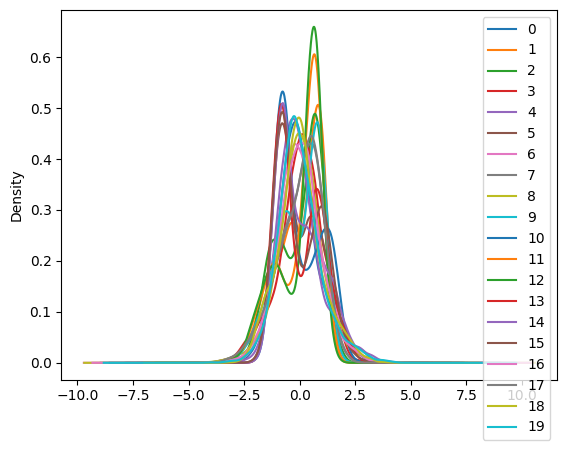

In [23]:
pd.DataFrame(X_values).plot(kind='density')

## pca 

In [24]:
pca_general = PCA()

In [25]:
pca_general.fit(X_values)

PCA()

In [26]:
explained_variance = pca_general.explained_variance_ratio_

In [27]:
explained_variance

array([0.39502762, 0.15364851, 0.08574439, 0.04985371, 0.04426612,
       0.03331052, 0.03046299, 0.02662351, 0.02492673, 0.02358927,
       0.02154014, 0.01741722, 0.0154148 , 0.01434986, 0.01399081,
       0.01159505, 0.01121016, 0.01003058, 0.00880363, 0.00819438])

In [28]:
eigenvalues = pca_general.explained_variance_

In [29]:
pd.DataFrame(eigenvalues)

0
0   7.901342
1   3.073278
2   1.715059
3   0.997174
4   0.885411
5   0.666277
6   0.609321
7   0.532524
8   0.498585
9   0.471833
10  0.430846
11  0.348379
12  0.308327
13  0.287026
14  0.279844
15  0.231924
16  0.224226
17  0.200632
18  0.176090
19  0.163904

In [30]:
eigenvectors = pca_general.components_

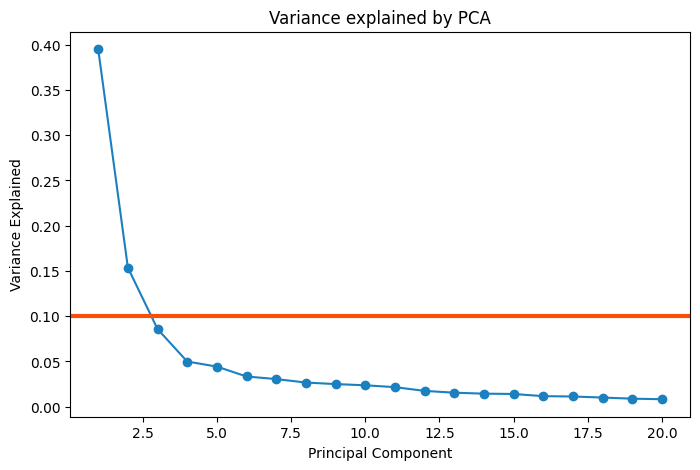

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [32]:
pca = PCA(n_components=3)

In [33]:
principal_components = pca.fit_transform(X_values)

In [34]:
pd.DataFrame(principal_components).head(8)

0         1         2
0  3.022354  0.242873 -0.015274
1  2.415144 -0.245728 -0.018105
2  3.381612  0.449606  0.522946
3  2.563461 -0.409697 -0.014328
4  2.634445  0.060129  1.066385
5  2.930359  0.259452  0.063353
6  2.246869  0.323039  0.843399
7  2.143719  0.988301  0.379312

In [35]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2','principal component 3'])

In [36]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [37]:
final_df

principal component 1  principal component 2  principal component 3  \
0                  3.022354               0.242873              -0.015274   
1                  2.415144              -0.245728              -0.018105   
2                  3.381612               0.449606               0.522946   
3                  2.563461              -0.409697              -0.014328   
4                  2.634445               0.060129               1.066385   
...                     ...                    ...                    ...   
9995              -1.211541              -3.105403              -1.606647   
9996              -1.515397              -1.784431              -1.239204   
9997              -1.072602              -3.305874              -1.125073   
9998              -2.144546              -2.120674              -1.170212   
9999              -0.309782              -2.877025              -1.838077   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9995       2  
9996       2  
9997       2  
9998       2  
9999       2  

[10000 rows x 4 columns]

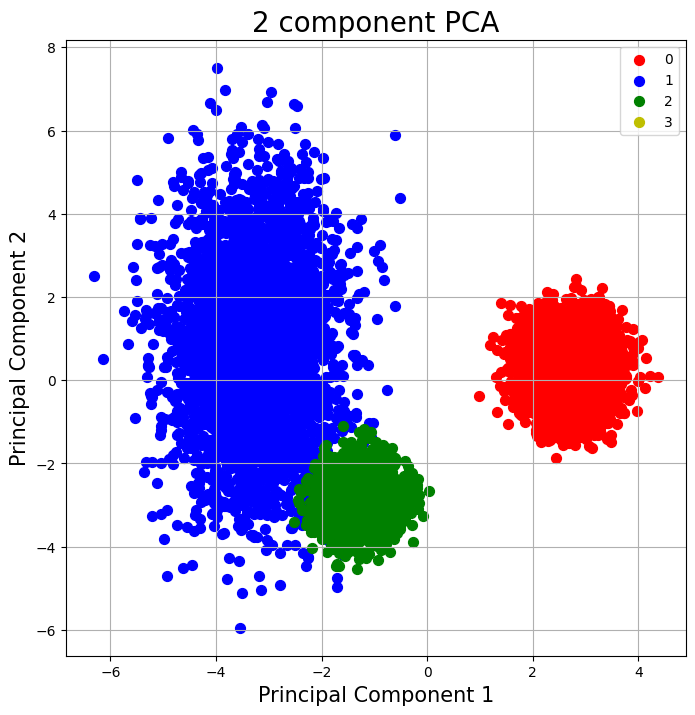

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

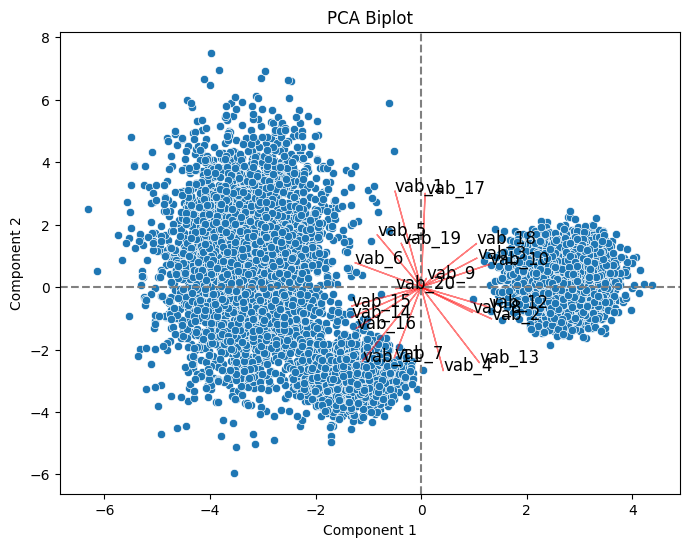

In [39]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

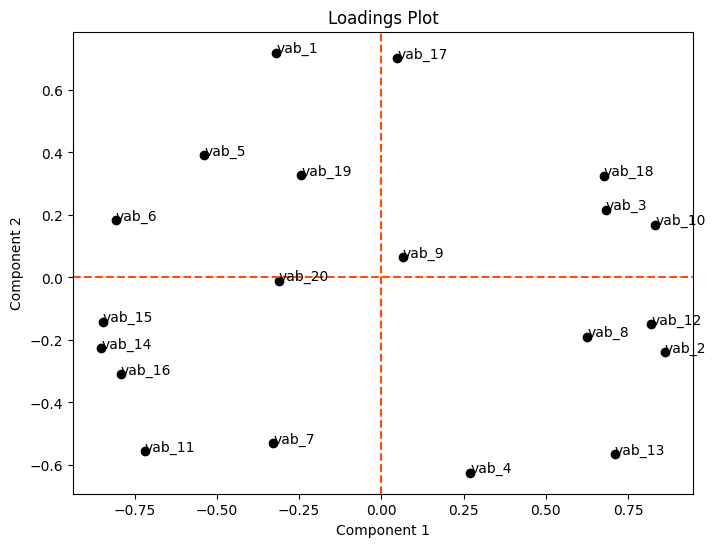

In [40]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

In [41]:
X_pca = pca.transform(X_values)

In [42]:
pd.DataFrame(X_pca).head()

0         1         2
0  3.022354  0.242873 -0.015274
1  2.415144 -0.245728 -0.018105
2  3.381612  0.449606  0.522946
3  2.563461 -0.409697 -0.014328
4  2.634445  0.060129  1.066385

## t-SNE

In [43]:
tsne = TSNE(n_components=3,random_state=42)

In [44]:
X_tsne = tsne.fit_transform(X_values)

In [45]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2','dim_3')),corr_dataset['target']],axis=1)

In [46]:
tsne_data

dim_1      dim_2      dim_3  target
0     19.664562  32.676945   4.050908       0
1      4.689471 -19.517429  14.879769       0
2     42.642860  -7.054842  -4.389139       0
3      0.286105   2.524154   9.365608       0
4      4.822382  14.578659  18.349909       0
...         ...        ...        ...     ...
9995  -7.226824 -22.296116 -20.755701       2
9996 -18.533587 -34.622066 -20.335434       2
9997 -10.162276 -21.597698 -21.700287       2
9998  -9.259201 -14.457967 -17.848959       2
9999  -2.859521 -37.849007 -15.921741       2

[10000 rows x 4 columns]

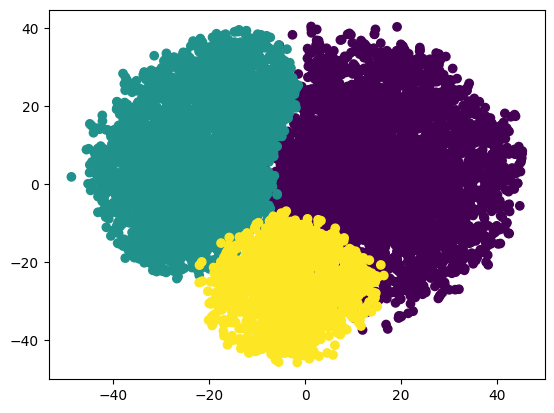

In [47]:
plt.scatter(x=tsne_data['dim_1'],y=tsne_data['dim_2'],c=tsne_data['target'])
plt.show()

In [48]:
tsne.kl_divergence_

2.9083595275878906

## umap

In [49]:
umap = umap.UMAP(n_components=3,random_state=42)

In [50]:
X_umap = umap.fit_transform(X_values)

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [51]:
umap_data = pd.concat([pd.DataFrame(X_umap,columns=('dim_1','dim_2','dim_3')),corr_dataset['target']],axis=1)

In [52]:
umap_data

dim_1     dim_2     dim_3  target
0     13.115203  4.018450  3.663498       0
1     12.877442  2.735612  2.517647       0
2     13.194492  3.015005  3.005174       0
3     12.424828  2.313593  2.607896       0
4     12.082438  3.553770  3.309653       0
...         ...       ...       ...     ...
9995  -9.336096  5.269505 -0.414006       2
9996  -9.546868  5.089677 -0.915255       2
9997  -9.378987  5.590175 -0.410270       2
9998  -9.275974  5.928479 -0.594271       2
9999  -9.258690  4.821692 -1.038953       2

[10000 rows x 4 columns]

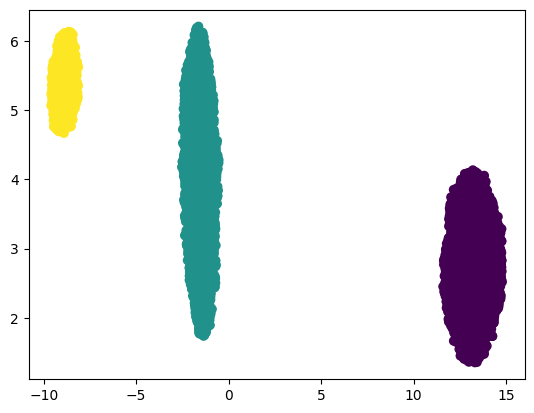

In [53]:
plt.scatter(umap_data['dim_1'],umap_data['dim_2'],c=umap_data['target'])
plt.show()

## k-means 

In [54]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [55]:
kmeans.fit(X_values)

KMeans(n_clusters=3, random_state=42)

In [56]:
df_kmeans = corr_dataset.copy()

In [57]:
df_kmeans['k_means'] = kmeans.labels_

In [58]:
df_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      k_means  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        1  
9996        1  
9997        1  
9998        1  
9999        1  

[10000 rows x 22 columns]

In [59]:
y_true = df_kmeans['target'].values  
y_kmeans = df_kmeans['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_kmeans['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_kmeans['k_means'] == y_true))

accuracy before: 0.5982
accuracy after: 0.6014


In [60]:
df_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      k_means  
0           2  
1           2  
2           2  
3           2  
4           2  
...       ...  
9995        1  
9996        1  
9997        1  
9998        1  
9999        1  

[10000 rows x 22 columns]

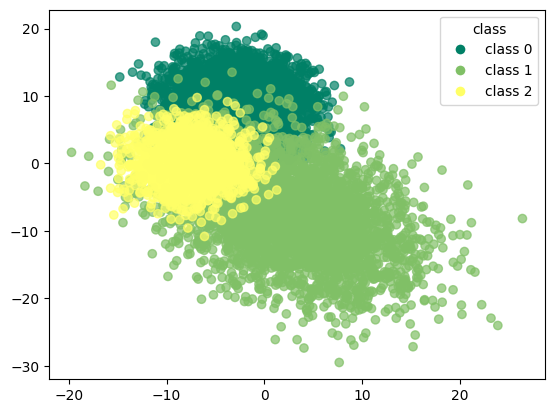

In [61]:
scatter = plt.scatter(df_kmeans.iloc[:, 0],df_kmeans.iloc[:, 1], 
                      c=df_kmeans['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_kmeans['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

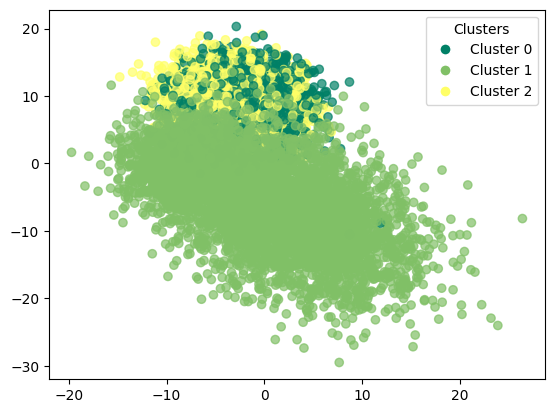

In [62]:
scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_kmeans['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [63]:
kmeans.cluster_centers_

array([[-0.2691976 ,  0.84543862,  0.76816877,  0.13108484, -0.63596965,
        -0.85448658, -0.06448122,  0.67746806,  0.33592578,  0.76439739,
        -0.76158101,  0.69820364,  0.61482483, -0.83007236, -0.75530378,
        -0.79590398, -0.21270098,  0.56751346, -0.03842763, -0.15226172],
       [ 0.17960751, -0.81157313, -0.73366044, -0.11934671,  0.45860631,
         0.79563283,  0.35445003, -0.61601929, -0.07697896, -0.8027242 ,
         0.80672054, -0.72170263, -0.57243145,  0.84814271,  0.79973082,
         0.81622658, -0.12278382, -0.6524051 ,  0.08964621,  0.24883993],
       [-0.09058714,  0.77673927,  0.69831389,  0.10753073, -0.28220687,
        -0.73607473, -0.64108536,  0.55417685, -0.17961736,  0.83940727,
        -0.8501449 ,  0.74382844,  0.5295318 , -0.86469048, -0.84246061,
        -0.83505588,  0.45486918,  0.73544754, -0.14023294, -0.34409971]])

In [64]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[2516    0 2484]
 [   2 3498    0]
 [   0 1500    0]]


In [65]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      5000
           1       0.70      1.00      0.82      3500
           2       0.00      0.00      0.00      1500

    accuracy                           0.60     10000
   macro avg       0.57      0.50      0.50     10000
weighted avg       0.74      0.60      0.62     10000



In [66]:
adjusted_rand_score(df_kmeans['target'],df_kmeans['k_means'])

0.5140436754286721

In [67]:
normalized_mutual_info_score(df_kmeans['target'],df_kmeans['k_means'])

0.6785535757075102

In [68]:
silhouette_score(df_kmeans.drop(columns=['target','k_means']).values,df_kmeans['k_means'])

0.1348148486559204

### k-means with pca

In [69]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [70]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [71]:
df_pca_kmeans = corr_dataset.copy()

In [72]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [73]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      kmeans_pca  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
9995           1  
9996           1  
9997           1  
9998           1  
9999           1  

[10000 rows x 22 columns]

In [74]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.5212
accuracy after: 0.9788


In [75]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      kmeans_pca  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
9995           2  
9996           2  
9997           2  
9998           2  
9999           2  

[10000 rows x 22 columns]

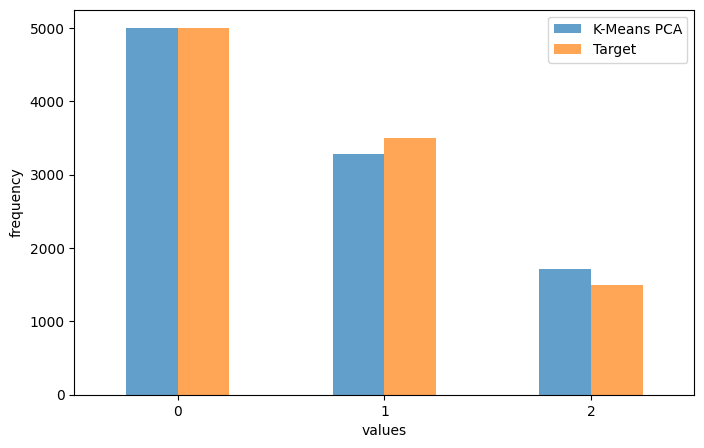

In [76]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [77]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[5000    0    0]
 [   0 3288  212]
 [   0    0 1500]]


In [78]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      0.94      0.97      3500
           2       0.88      1.00      0.93      1500

    accuracy                           0.98     10000
   macro avg       0.96      0.98      0.97     10000
weighted avg       0.98      0.98      0.98     10000



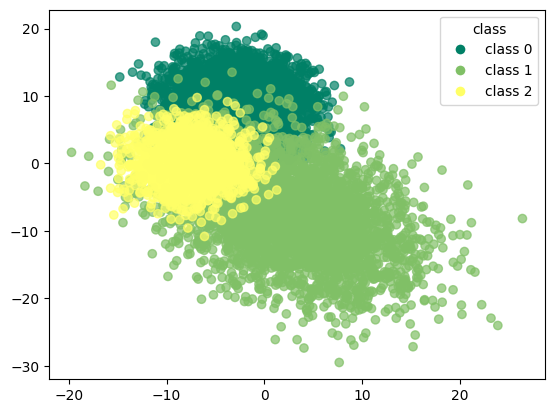

In [79]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

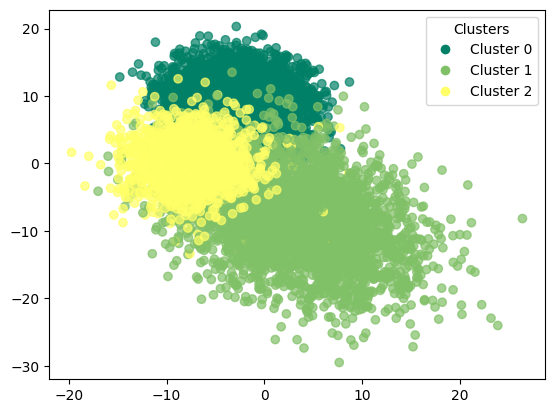

In [80]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

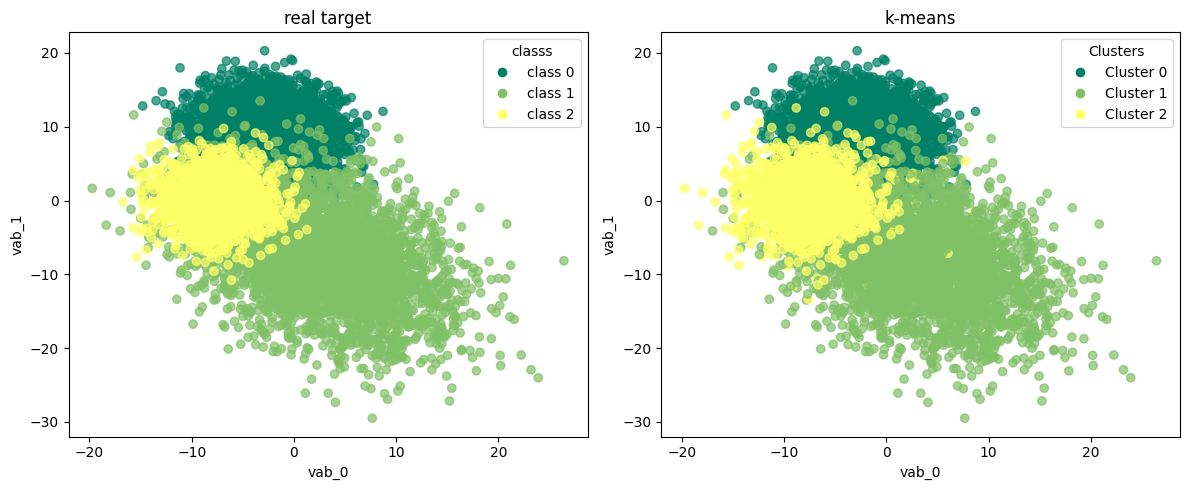

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

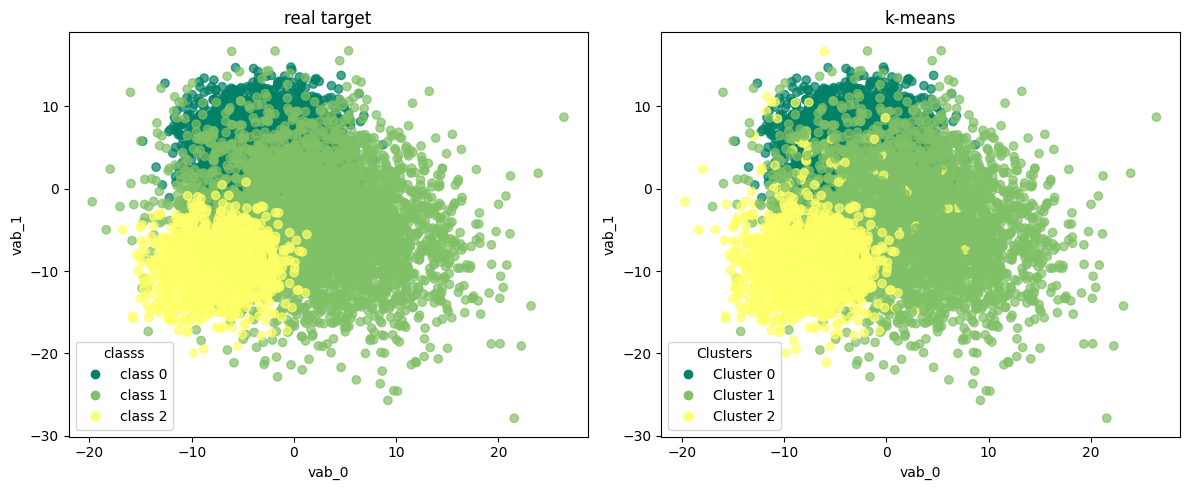

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

In [83]:
adjusted_rand_score(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca'])

0.9573760045898848

In [84]:
normalized_mutual_info_score(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca'])

0.9284161404587924

In [85]:
silhouette_score(df_pca_kmeans.drop(columns=['target','kmeans_pca']).values,df_pca_kmeans['kmeans_pca'])

0.41130211565401814

### k-means with t-SNE

In [86]:
kmeans_tsne = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [87]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=3, random_state=42)

In [88]:
df_tsne_kmeans = corr_dataset.copy()

In [89]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [90]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      kmeans_tsne  
0               0  
1               2  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

In [91]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.8803
accuracy after: 0.8803


In [92]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      kmeans_tsne  
0               0  
1               2  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

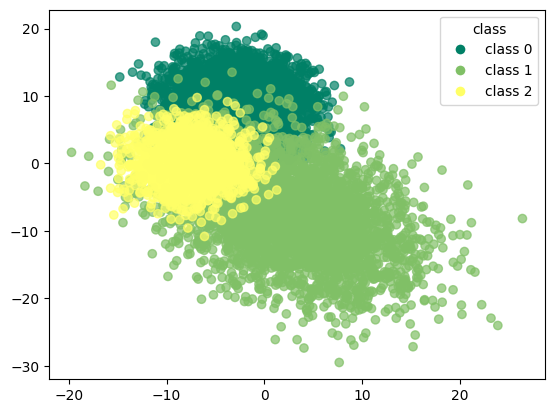

In [93]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

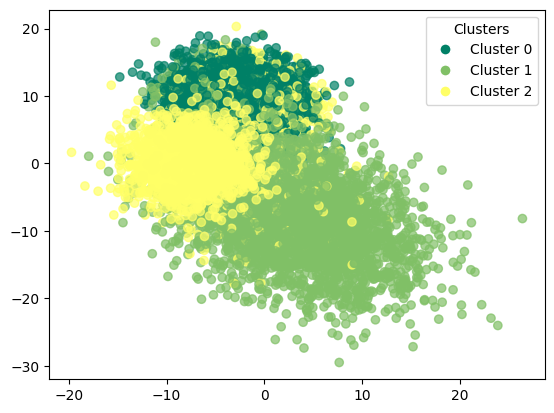

In [94]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

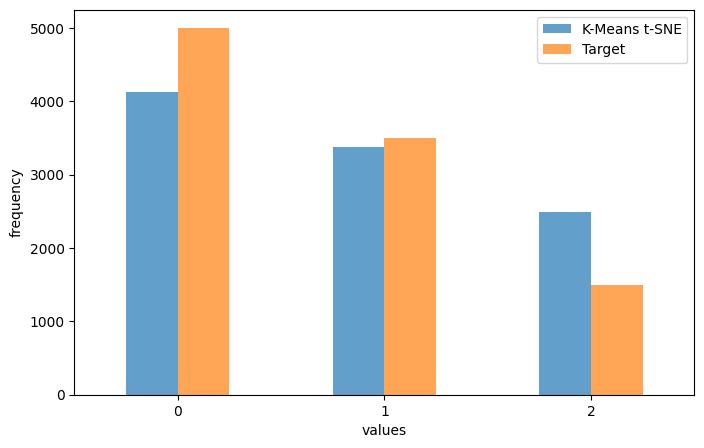

In [95]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [96]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[4130  204  666]
 [   0 3173  327]
 [   0    0 1500]]


In [97]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.83      0.90      5000
           1       0.94      0.91      0.92      3500
           2       0.60      1.00      0.75      1500

    accuracy                           0.88     10000
   macro avg       0.85      0.91      0.86     10000
weighted avg       0.92      0.88      0.89     10000



In [98]:
adjusted_rand_score(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])

0.6955104061875428

In [99]:
normalized_mutual_info_score(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])

0.665494205475396

In [100]:
silhouette_score(df_tsne_kmeans.drop(columns=['target','kmeans_tsne']).values,df_tsne_kmeans['kmeans_tsne'])

0.26870892182226164

### k-means with umap

In [101]:
kmeans_umap = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [102]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [103]:
df_umap_kmeans = corr_dataset.copy()

In [104]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [105]:
df_umap_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      kmeans_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[10000 rows x 22 columns]

In [106]:
y_true = df_umap_kmeans['target'].values  
y_kmeans = df_umap_kmeans['kmeans_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_kmeans['kmeans_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_kmeans['kmeans_umap'] == y_true))

accuracy before: 0.5001
accuracy after: 0.9999


In [107]:
df_umap_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      kmeans_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

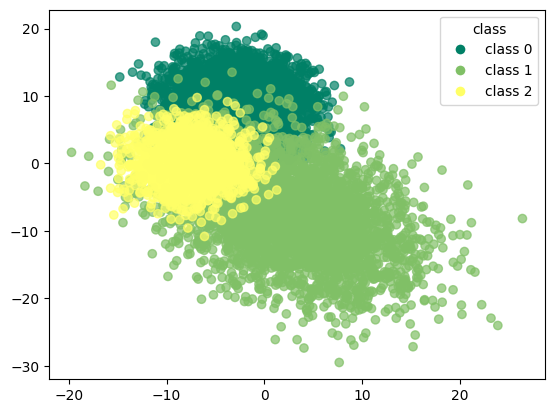

In [108]:
scatter = plt.scatter(df_umap_kmeans.iloc[:, 0], df_umap_kmeans.iloc[:, 1], 
                      c=df_umap_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

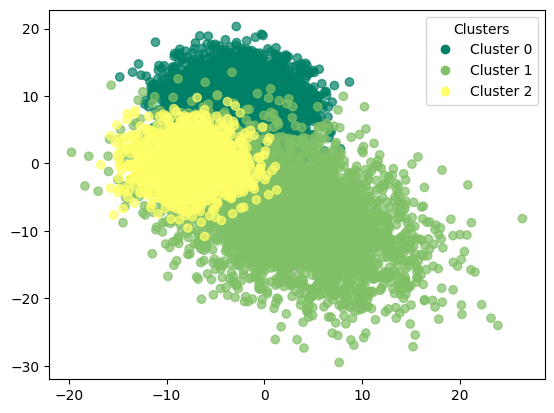

In [109]:
scatter = plt.scatter(df_umap_kmeans.iloc[:, 0], df_umap_kmeans.iloc[:, 1], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

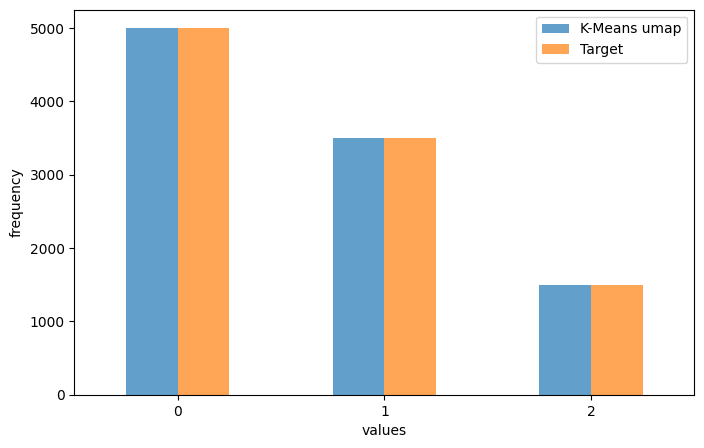

In [110]:
counts_kmeans = df_umap_kmeans['kmeans_umap'].value_counts().sort_index()
counts_target = df_umap_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means umap': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means umap", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [111]:
print(confusion_matrix(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap']))

[[5000    0    0]
 [   0 3499    1]
 [   0    0 1500]]


In [112]:
print(classification_report(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [113]:
adjusted_rand_score(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])

0.9997907792130399

In [114]:
normalized_mutual_info_score(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])

0.9991250976470251

In [115]:
silhouette_score(df_umap_kmeans.drop(columns=['target','kmeans_umap']).values,df_umap_kmeans['kmeans_umap'])

0.40715957673905095

## trimmed k-means

In [116]:
def trimmed_clustering(X,n_clusters,trim_fraction=0.1):

    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    distances = np.min(kmeans.transform(X),axis=1)
    
    trim_threshold = np.percentile(distances,100 * (1 - trim_fraction))
    trimmed_X = X[distances < trim_threshold]
    trimmed_indices = np.where(distances < trim_threshold)[0]
    trimmed_kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(trimmed_X)
    
    return trimmed_kmeans,trimmed_indices

In [117]:
trimmed_kmeans,trimmmed_indces = trimmed_clustering(X_values,n_clusters=3,trim_fraction=0.1)

In [118]:
trimmed_kmeans

KMeans(n_clusters=3, random_state=42)

In [119]:
df_trim_kmeans = corr_dataset.copy()

In [120]:
df_trim_kmeans = df_trim_kmeans.iloc[trimmmed_indces]  

In [121]:
df_trim_kmeans['trim_kmeans'] = trimmed_kmeans.labels_

In [122]:
df_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans  
0               0  
1               0  
2               2  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[9000 rows x 22 columns]

In [123]:
y_true = df_trim_kmeans['target'].values  
y_kmeans = df_trim_kmeans['trim_kmeans'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_trim_kmeans['trim_kmeans'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_trim_kmeans['trim_kmeans'] == y_true))

accuracy before: 0.5601111111111111
accuracy after: 0.5601111111111111


In [124]:
df_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans  
0               0  
1               0  
2               2  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[9000 rows x 22 columns]

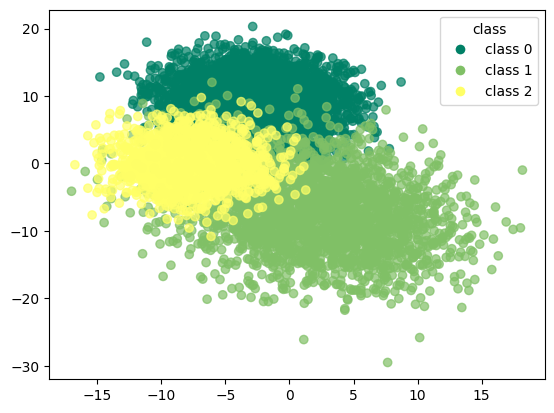

In [125]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

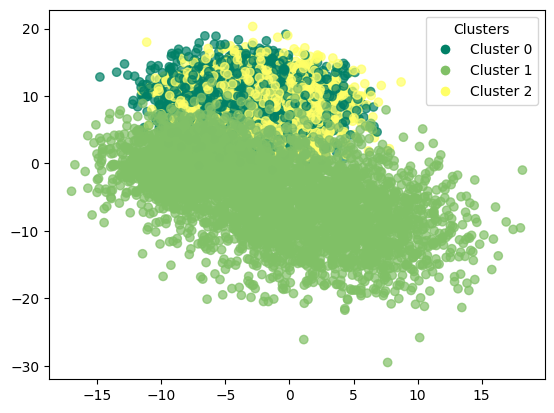

In [126]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['trim_kmeans'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_trim_kmeans['trim_kmeans'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [127]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[2535    0 2465]
 [   0 2506    0]
 [   0 1494    0]]


In [128]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5000
           1       0.63      1.00      0.77      2506
           2       0.00      0.00      0.00      1494

    accuracy                           0.56      9000
   macro avg       0.54      0.50      0.48      9000
weighted avg       0.73      0.56      0.59      9000



In [129]:
adjusted_rand_score(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans'])

0.4798575424977233

In [130]:
normalized_mutual_info_score(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans'])

0.6693457697998443

In [131]:
silhouette_score(df_trim_kmeans.drop(columns=['target','trim_kmeans']).values,df_trim_kmeans['trim_kmeans'])

0.14236397187753996

### trimmed k-means with pca

In [132]:
trim_kmeans_pca,trimmmed_indices = trimmed_clustering(X_pca,n_clusters=3,trim_fraction=0.1)

In [133]:
trim_kmeans_pca

KMeans(n_clusters=3, random_state=42)

In [134]:
df_pca_trim_kmeans = corr_dataset.copy()

In [135]:
df_pca_trim_kmeans = df_pca_trim_kmeans.iloc[trimmmed_indces]  

In [136]:
df_pca_trim_kmeans["trim_kmeans_pca"] = trim_kmeans_pca.labels_

In [137]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans_pca  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9995                1  
9996                1  
9997                1  
9998                1  
9999                1  

[9000 rows x 22 columns]

In [138]:
y_true = df_pca_trim_kmeans['target'].values  
y_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_trim_kmeans['trim_kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_trim_kmeans['trim_kmeans_pca'] == y_true))

accuracy before: 0.5614444444444444
accuracy after: 0.9941111111111111


In [139]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans_pca  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9995                2  
9996                2  
9997                2  
9998                2  
9999                2  

[9000 rows x 22 columns]

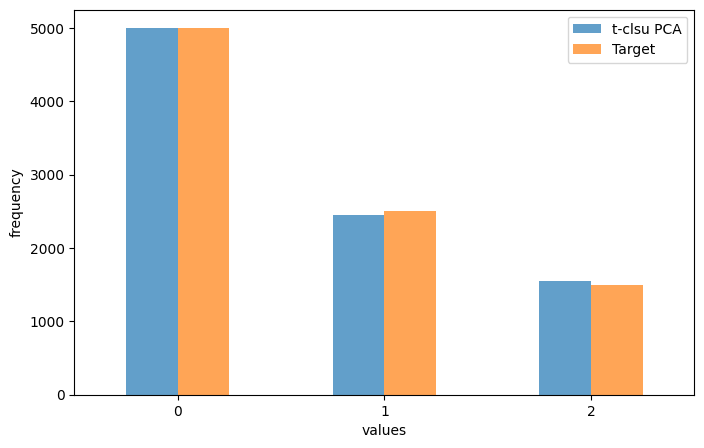

In [140]:
counts_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'t-clust PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["t-clsu PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [141]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[5000    0    0]
 [   0 2453   53]
 [   0    0 1494]]


In [142]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      0.98      0.99      2506
           2       0.97      1.00      0.98      1494

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [143]:
adjusted_rand_score(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca'])

0.9893461646871279

In [144]:
normalized_mutual_info_score(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca'])

0.9724111604250297

In [145]:
silhouette_score(df_pca_trim_kmeans.drop(columns=['target','trim_kmeans_pca']).values,df_pca_trim_kmeans['trim_kmeans_pca'])

0.44363739780388195

### trimmed k-means with t-SNE

In [146]:
trim_kmeans_tsne,trimmmed_indices = trimmed_clustering(X_tsne,n_clusters=3,trim_fraction=0.1)

In [147]:
trim_kmeans_tsne

KMeans(n_clusters=3, random_state=42)

In [148]:
df_tsne_trim_kmeans = corr_dataset.copy()

In [149]:
df_tsne_trim_kmeans = df_tsne_trim_kmeans.iloc[trimmmed_indces]  

In [150]:
df_tsne_trim_kmeans['trim_kmeans_tsne'] = trim_kmeans_tsne.labels_

In [151]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans_tsne  
0                    2  
1                    0  
2                    2  
3                    2  
4                    2  
...                ...  
9995                 0  
9996                 0  
9997                 0  
9998                 0  
9999                 0  

[9000 rows x 22 columns]

In [152]:
y_true = df_tsne_trim_kmeans['target'].values  
y_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_trim_kmeans['trim_kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_trim_kmeans['trim_kmeans_tsne'] == y_true))

accuracy before: 0.31755555555555554
accuracy after: 0.8086666666666666


In [153]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans_tsne  
0                    0  
1                    2  
2                    0  
3                    0  
4                    0  
...                ...  
9995                 2  
9996                 2  
9997                 2  
9998                 2  
9999                 2  

[9000 rows x 22 columns]

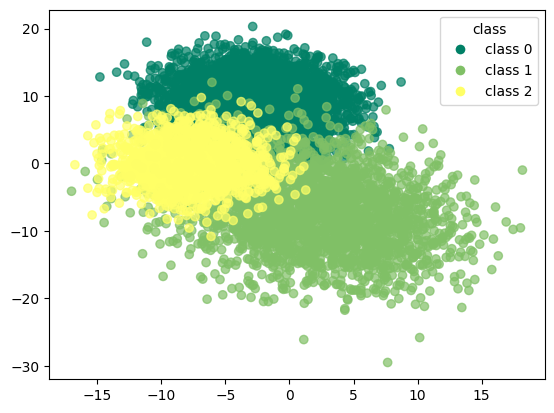

In [154]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

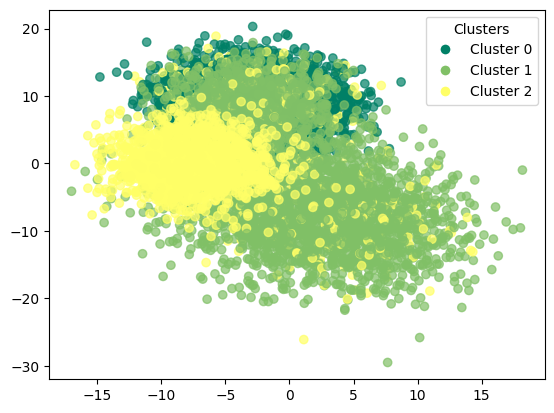

In [155]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['trim_kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_trim_kmeans['trim_kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

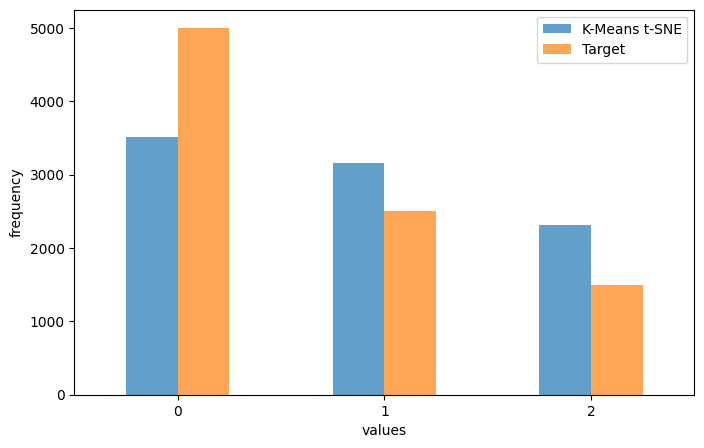

In [156]:
counts_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [157]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne']))

[[3515  896  589]
 [   0 2269  237]
 [   0    0 1494]]


In [158]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.70      0.83      5000
           1       0.72      0.91      0.80      2506
           2       0.64      1.00      0.78      1494

    accuracy                           0.81      9000
   macro avg       0.79      0.87      0.80      9000
weighted avg       0.86      0.81      0.81      9000



In [159]:
adjusted_rand_score(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])

0.49381448582105136

In [160]:
normalized_mutual_info_score(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])

0.5310456446233887

In [161]:
silhouette_score(df_tsne_trim_kmeans.drop(columns=['target','trim_kmeans_tsne']).values,df_tsne_trim_kmeans['trim_kmeans_tsne'])

0.18509665819467763

### trimmed k-means with umap

In [162]:
trim_kmeans_umap,trimmmed_indices = trimmed_clustering(X_umap,n_clusters=3,trim_fraction=0.1)

In [163]:
trim_kmeans_umap

KMeans(n_clusters=3, random_state=42)

In [164]:
df_umap_trim_kmeans = corr_dataset.copy()

In [165]:
df_umap_trim_kmeans = df_umap_trim_kmeans.iloc[trimmmed_indices]

In [166]:
df_umap_trim_kmeans['trim_kmeans_umap'] = trim_kmeans_umap.labels_

In [167]:
df_umap_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans_umap  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
9995                 1  
9996                 1  
9997                 1  
9998                 1  
9999                 1  

[9000 rows x 22 columns]

In [168]:
y_true = df_umap_trim_kmeans['target'].values  
y_kmeans = df_umap_trim_kmeans['trim_kmeans_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_trim_kmeans['trim_kmeans_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_trim_kmeans['trim_kmeans_umap'] == y_true))

accuracy before: 0.5385555555555556
accuracy after: 0.9998888888888889


In [169]:
df_umap_trim_kmeans

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      trim_kmeans_umap  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
9995                 2  
9996                 2  
9997                 2  
9998                 2  
9999                 2  

[9000 rows x 22 columns]

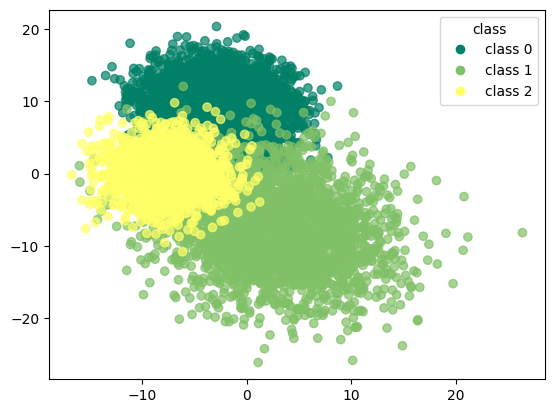

In [170]:
scatter = plt.scatter(df_umap_trim_kmeans.iloc[:, 0], df_umap_trim_kmeans.iloc[:, 1], 
                      c=df_umap_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

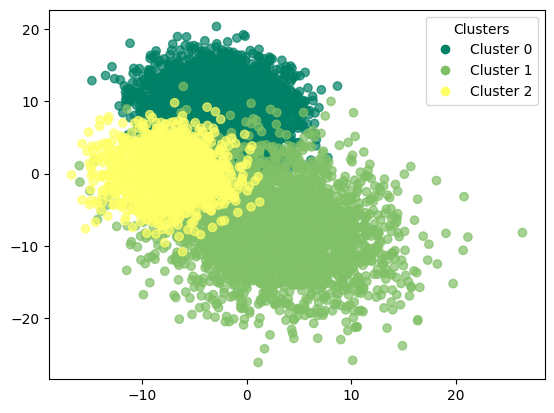

In [171]:
scatter = plt.scatter(df_umap_trim_kmeans.iloc[:, 0], df_umap_trim_kmeans.iloc[:, 1], 
                      c=df_umap_trim_kmeans['trim_kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_trim_kmeans['trim_kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

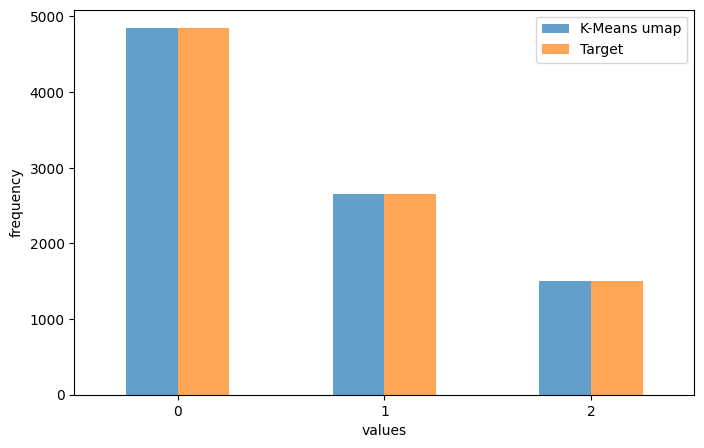

In [172]:
counts_kmeans = df_umap_trim_kmeans['trim_kmeans_umap'].value_counts().sort_index()
counts_target = df_umap_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means umap': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means umap", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [173]:
print(confusion_matrix(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap']))

[[4846    0    0]
 [   0 2653    1]
 [   0    0 1500]]


In [174]:
print(classification_report(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4846
           1       1.00      1.00      1.00      2654
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [175]:
adjusted_rand_score(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])

0.9997871382663255

In [176]:
normalized_mutual_info_score(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])

0.9990369920034609

In [177]:
silhouette_score(df_umap_trim_kmeans.drop(columns=['target','trim_kmeans_umap']).values,df_umap_trim_kmeans['trim_kmeans_umap'])

0.4436216181354427

## dbscan

In [178]:
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

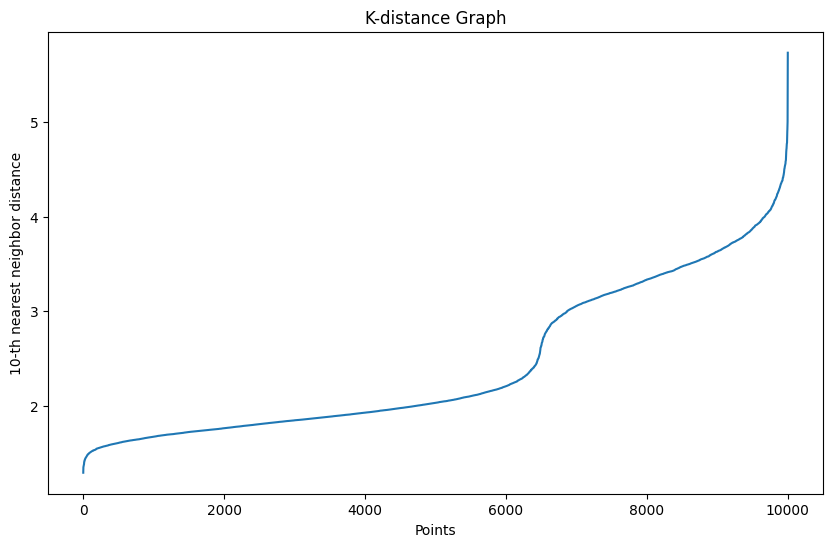

In [179]:
plot_k_distance_graph(X_values,k=10) 

In [180]:
dbscan = DBSCAN(eps=0.9,min_samples=10) # min_samples = 2*n_features

In [181]:
dbscan.fit(X_values)

DBSCAN(eps=0.9, min_samples=10)

In [182]:
df_dbscan = corr_dataset.copy()

In [183]:
df_dbscan['dbscan'] = dbscan.labels_

In [184]:
y_true = df_dbscan['target'].values  
y_kmeans = df_dbscan['dbscan'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_dbscan['dbscan'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_dbscan['dbscan'] == y_true))

accuracy before: 0.0
accuracy after: 0.0


In [185]:
df_dbscan

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      dbscan  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1  
...      ...  
9995      -1  
9996      -1  
9997      -1  
9998      -1  
9999      -1  

[10000 rows x 22 columns]

In [186]:
print(df_dbscan['dbscan'].value_counts())

dbscan
-1    10000
Name: count, dtype: int64


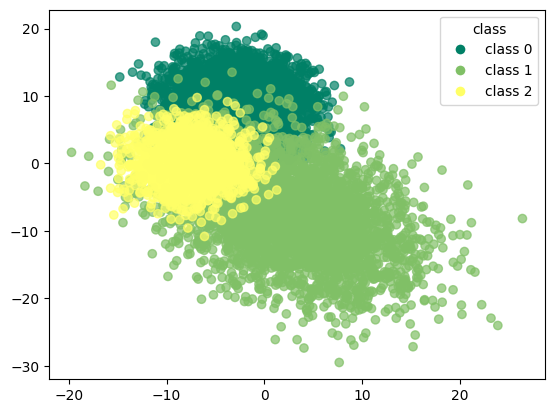

In [187]:
scatter = plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], 
                      c=df_dbscan['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_dbscan['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

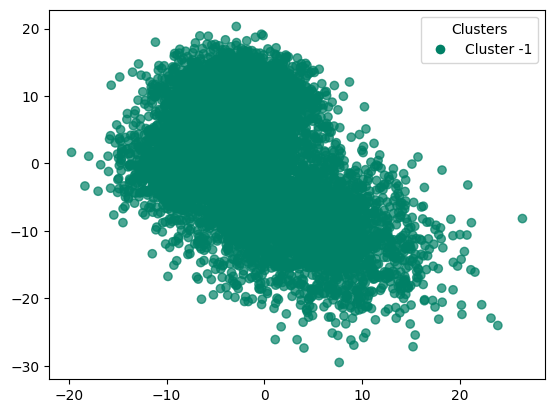

In [188]:
scatter = plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], 
                      c=df_dbscan['dbscan'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_dbscan['dbscan'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [189]:
print(confusion_matrix(df_dbscan['target'],df_dbscan['dbscan']))

[[   0    0    0    0]
 [5000    0    0    0]
 [3500    0    0    0]
 [1500    0    0    0]]


In [190]:
print(classification_report(df_dbscan['target'],df_dbscan['dbscan']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    5000.0
           1       0.00      0.00      0.00    3500.0
           2       0.00      0.00      0.00    1500.0

    accuracy                           0.00   10000.0
   macro avg       0.00      0.00      0.00   10000.0
weighted avg       0.00      0.00      0.00   10000.0



In [191]:
adjusted_rand_score(df_dbscan['target'],df_dbscan['dbscan'])

0.0

In [192]:
normalized_mutual_info_score(df_dbscan['target'],df_dbscan['dbscan'])

0.0

In [193]:
# silhouette_score(df_dbscan.drop(columns=['target','dbscan']).values,df_dbscan['dbscan'])

### dbscan with pca

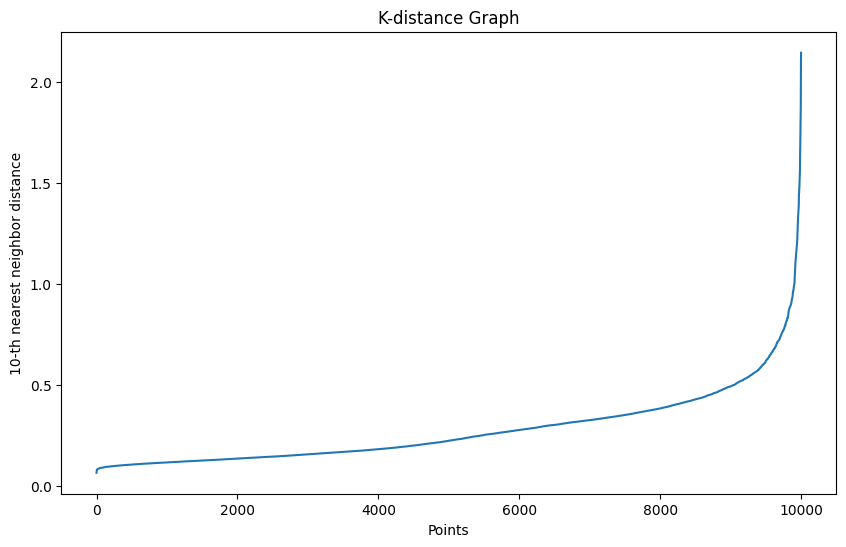

In [194]:
plot_k_distance_graph(X_pca,k=10)

In [195]:
dbscan_pca = DBSCAN(eps=0.4,min_samples=10)

In [196]:
dbscan_pca.fit(X_pca)

DBSCAN(eps=0.4, min_samples=10)

In [197]:
df_pca_dbscan = corr_dataset.copy()

In [198]:
df_pca_dbscan["dbscan_pca"] = dbscan_pca.labels_

In [199]:
y_true = df_pca_dbscan['target'].values  
y_kmeans = df_pca_dbscan['dbscan_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_dbscan['dbscan_pca'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_dbscan['dbscan_pca'] == y_true))

accuracy before: 0.7477
accuracy after: 0.7477


In [200]:
df_pca_dbscan

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      dbscan_pca  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
9995           6  
9996           6  
9997           6  
9998           6  
9999           6  

[10000 rows x 22 columns]

In [201]:
print(df_pca_dbscan['dbscan_pca'].value_counts())

dbscan_pca
 0    4971
 1    2506
 6    1474
-1    1017
 2      13
 5      10
 4       9
Name: count, dtype: int64


In [202]:
print(confusion_matrix(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

[[   0    0    0    0    0    0    0]
 [  29 4971    0    0    0    0    0]
 [ 962    0 2506   13    9   10    0]
 [  26    0    0    0    0    0 1474]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]


In [203]:
print(classification_report(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.99      1.00      5000
           1       1.00      0.72      0.83      3500
           2       0.00      0.00      0.00      1500
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.75     10000
   macro avg       0.29      0.24      0.26     10000
weighted avg       0.85      0.75      0.79     10000



In [204]:
adjusted_rand_score(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca'])

0.8818077627746467

In [205]:
normalized_mutual_info_score(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca'])

0.8732351405657216

In [206]:
silhouette_score(df_pca_dbscan.drop(columns=['target','dbscan_pca']).values,df_pca_dbscan['dbscan_pca'])

0.3184149271039888

### dbscan with t-SNE

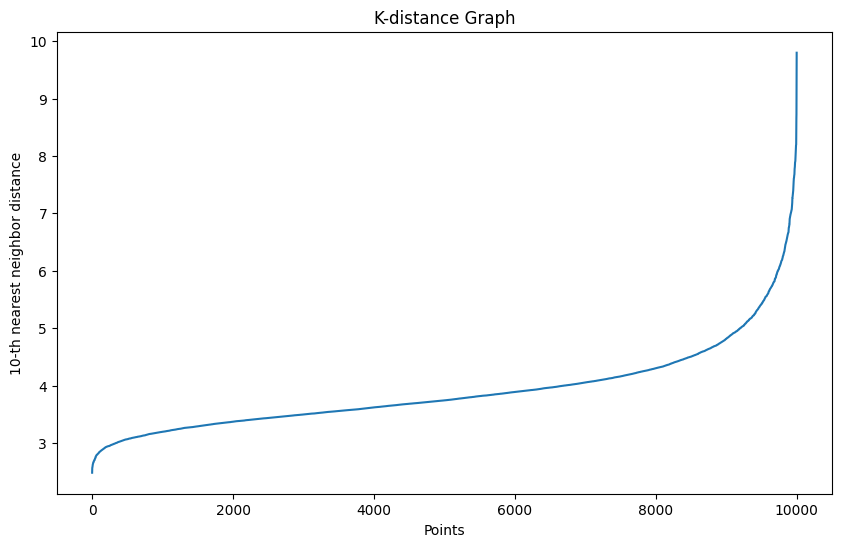

In [207]:
plot_k_distance_graph(X_tsne,k=10)

In [208]:
dbscan_tsne = DBSCAN(eps=3,min_samples=10)

In [209]:
dbscan_tsne.fit(X_tsne)

DBSCAN(eps=3, min_samples=10)

In [210]:
df_tsne_dbscan = corr_dataset.copy()

In [211]:
df_tsne_dbscan['dbscan_tsne'] = dbscan_tsne.labels_

In [212]:
y_true = df_tsne_dbscan['target'].values  
y_kmeans = df_tsne_dbscan['dbscan_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_dbscan['dbscan_tsne'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_dbscan['dbscan_tsne'] == y_true))

accuracy before: 0.0012
accuracy after: 0.0017


In [213]:
df_tsne_dbscan

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      dbscan_tsne  
0              -1  
1              -1  
2              -1  
3              -1  
4              -1  
...           ...  
9995           -1  
9996           -1  
9997           -1  
9998          116  
9999          113  

[10000 rows x 22 columns]

In [214]:
print(df_tsne_dbscan['dbscan_tsne'].value_counts())

dbscan_tsne
-1      8093
 104      83
 48       60
 49       36
 113      36
        ... 
 95        8
 125       8
 65        8
 17        7
 94        6
Name: count, Length: 128, dtype: int64


In [215]:
print(confusion_matrix(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

[[   0    0    0 ...    0    0    0]
 [4449   17   12 ...    0    0    0]
 [2606    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [216]:
print(classification_report(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.00      0.01      5000
           1       0.00      0.00      0.00      3500
           2       0.00      0.00      0.00      1500
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00    

In [217]:
adjusted_rand_score(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne'])

0.0681127675502996

In [218]:
normalized_mutual_info_score(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne'])

0.18802269868398955

In [219]:
silhouette_score(df_tsne_dbscan.drop(columns=['target','dbscan_tsne']).values,df_tsne_dbscan['dbscan_tsne'])

-0.4078932664106041

### dbscan with umap

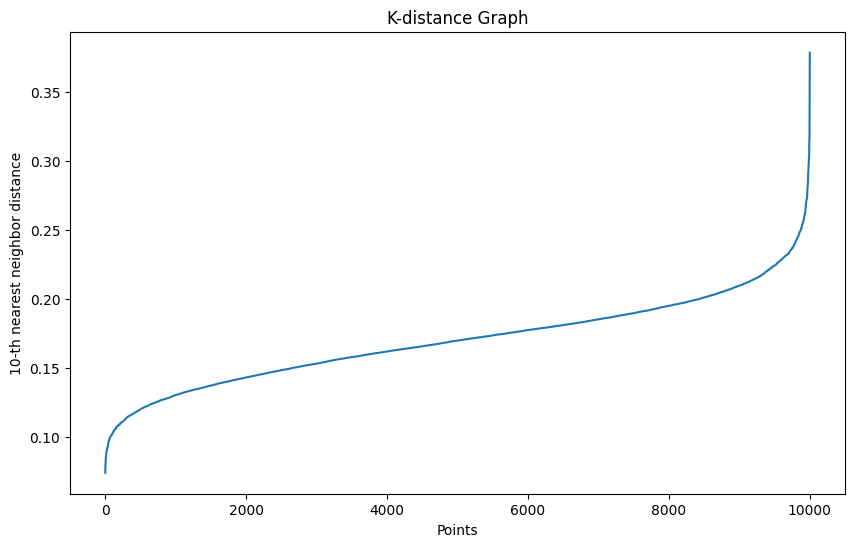

In [220]:
plot_k_distance_graph(X_umap,k=10)

In [221]:
dbscan_umap = DBSCAN(eps=0.6,min_samples=10)

In [222]:
dbscan_umap.fit(X_umap)

DBSCAN(eps=0.6, min_samples=10)

In [223]:
df_umap_dbscan = corr_dataset.copy()

In [224]:
df_umap_dbscan['dbscan_umap'] = dbscan_umap.labels_

In [225]:
y_true = df_umap_dbscan['target'].values  
y_kmeans = df_umap_dbscan['dbscan_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_dbscan['dbscan_umap'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_dbscan['dbscan_umap'] == y_true))

accuracy before: 0.9999
accuracy after: 0.9999


In [226]:
df_umap_dbscan

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      dbscan_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

In [227]:
print(df_umap_dbscan['dbscan_umap'].value_counts())

dbscan_umap
0    5000
1    3499
2    1501
Name: count, dtype: int64


In [228]:
print(confusion_matrix(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

[[5000    0    0]
 [   0 3499    1]
 [   0    0 1500]]


In [229]:
print(classification_report(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [230]:
adjusted_rand_score(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap'])

0.9997907792130399

In [231]:
normalized_mutual_info_score(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap'])

0.9991250976470251

In [232]:
silhouette_score(df_umap_dbscan.drop(columns=['target','dbscan_umap']).values,df_umap_dbscan['dbscan_umap'])

0.40715957673905095

## GMM - Gaussian Mixture Models

In [233]:
gmm = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [234]:
gmm.fit(X_values)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [235]:
df_gmm = corr_dataset.copy()

In [236]:
df_gmm['gmm'] = gmm.predict(X_values)

In [237]:
df_gmm

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      gmm  
0       0  
1       0  
2       0  
3       2  
4       2  
...   ...  
9995    1  
9996    1  
9997    1  
9998    1  
9999    1  

[10000 rows x 22 columns]

In [238]:
y_true = df_gmm['target'].values  
y_kmeans = df_gmm['gmm'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_gmm['gmm'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_gmm['gmm'] == y_true))

accuracy before: 0.5954
accuracy after: 0.6046


In [239]:
df_gmm

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      gmm  
0       2  
1       2  
2       2  
3       0  
4       0  
...   ...  
9995    1  
9996    1  
9997    1  
9998    1  
9999    1  

[10000 rows x 22 columns]

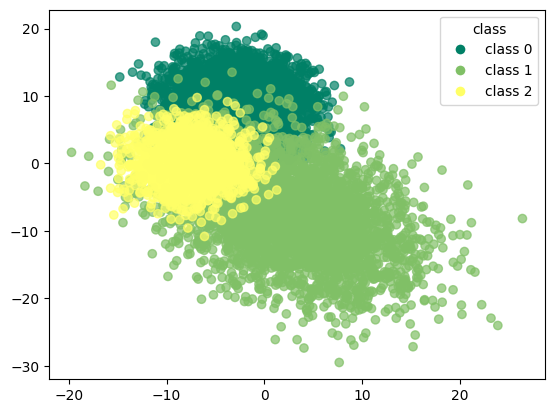

In [240]:
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

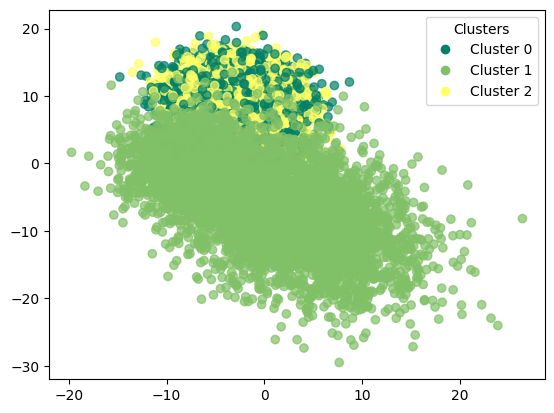

In [241]:
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [242]:
print(confusion_matrix(df_gmm['target'],df_gmm['gmm']))

[[2546    0 2454]
 [   0 3500    0]
 [   0 1500    0]]


In [243]:
print(classification_report(df_gmm['target'],df_gmm['gmm']))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5000
           1       0.70      1.00      0.82      3500
           2       0.00      0.00      0.00      1500

    accuracy                           0.60     10000
   macro avg       0.57      0.50      0.50     10000
weighted avg       0.74      0.60      0.63     10000



In [244]:
adjusted_rand_score(df_gmm['target'],df_gmm['gmm'])

0.5145328122477987

In [245]:
normalized_mutual_info_score(df_gmm['target'],df_gmm['gmm'])

0.6801510389474545

In [246]:
silhouette_score(df_gmm.drop(columns=['target','gmm']).values,df_gmm['gmm'])

0.1289678721608315

### GMM with pca

In [247]:
gmm_pca = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [248]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [249]:
df_pca_gmm = corr_dataset.copy()

In [250]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [251]:
df_pca_gmm

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      gmm_pca  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        1  
9996        1  
9997        1  
9998        1  
9999        1  

[10000 rows x 22 columns]

In [252]:
y_true = df_pca_gmm['target'].values  
y_kmeans = df_pca_gmm['gmm_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_gmm['gmm_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_gmm['gmm_pca'] == y_true))

accuracy before: 0.5
accuracy after: 1.0


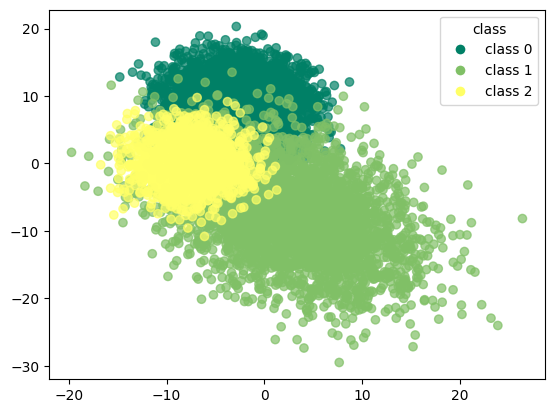

In [253]:
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

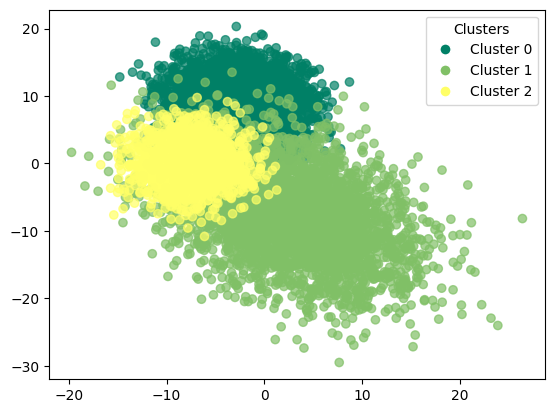

In [254]:
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [255]:
print(confusion_matrix(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [256]:
print(classification_report(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [257]:
adjusted_rand_score(df_pca_gmm['target'],df_pca_gmm['gmm_pca'])

1.0

In [258]:
normalized_mutual_info_score(df_pca_gmm['target'],df_pca_gmm['gmm_pca'])

1.0

In [259]:
silhouette_score(df_pca_gmm.drop(columns=['target','gmm_pca']).values,df_pca_gmm['gmm_pca'])

0.40710244628695696

### GMM with t-SNE

In [260]:
gmm_tsne = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [261]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [262]:
df_tsne_gmm = corr_dataset.copy()

In [263]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [264]:
df_tsne_gmm

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      gmm_tsne  
0            0  
1            2  
2            0  
3            1  
4            1  
...        ...  
9995         2  
9996         2  
9997         2  
9998         2  
9999         2  

[10000 rows x 22 columns]

In [265]:
y_true = df_tsne_gmm['target'].values  
y_kmeans = df_tsne_gmm['gmm_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_gmm['gmm_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_gmm['gmm_tsne'] == y_true))

accuracy before: 0.76
accuracy after: 0.76


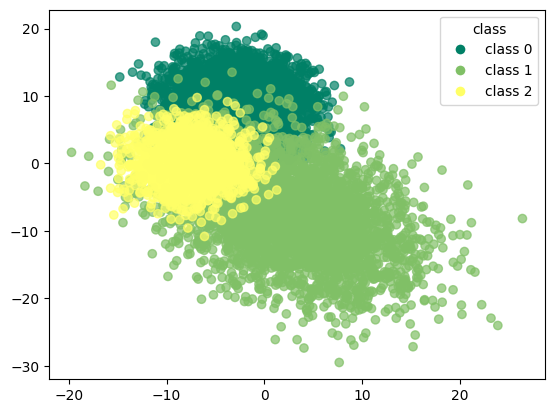

In [266]:
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

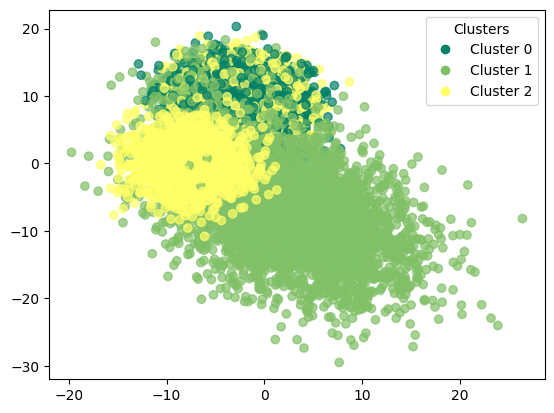

In [267]:
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [268]:
print(confusion_matrix(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

[[2610  875 1515]
 [   0 3500    0]
 [   0   10 1490]]


In [269]:
print(classification_report(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69      5000
           1       0.80      1.00      0.89      3500
           2       0.50      0.99      0.66      1500

    accuracy                           0.76     10000
   macro avg       0.76      0.84      0.75     10000
weighted avg       0.85      0.76      0.75     10000



In [270]:
adjusted_rand_score(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne'])

0.4475938221198288

In [271]:
normalized_mutual_info_score(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne'])

0.5446941388747203

In [272]:
silhouette_score(df_tsne_gmm.drop(columns=['target','gmm_tsne']).values,df_tsne_gmm['gmm_tsne'])

0.09326720456010848

### GMM with umap

In [273]:
gmm_umap = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [274]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [275]:
df_umap_gmm = corr_dataset.copy()

In [276]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [277]:
df_umap_gmm

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      gmm_umap  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
9995         1  
9996         1  
9997         1  
9998         1  
9999         1  

[10000 rows x 22 columns]

In [278]:
y_true = df_umap_gmm['target'].values  
y_kmeans = df_umap_gmm['gmm_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_gmm['gmm_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_gmm['gmm_umap'] == y_true))

accuracy before: 0.5001
accuracy after: 0.9999


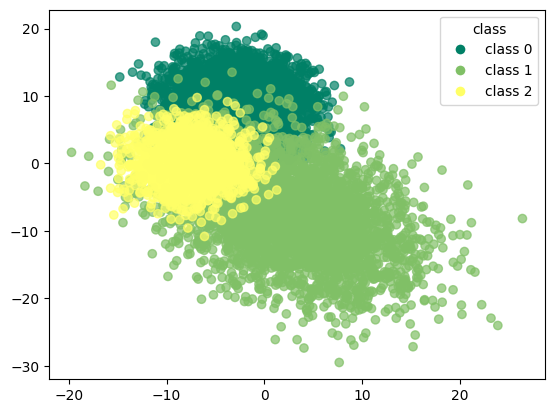

In [279]:
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

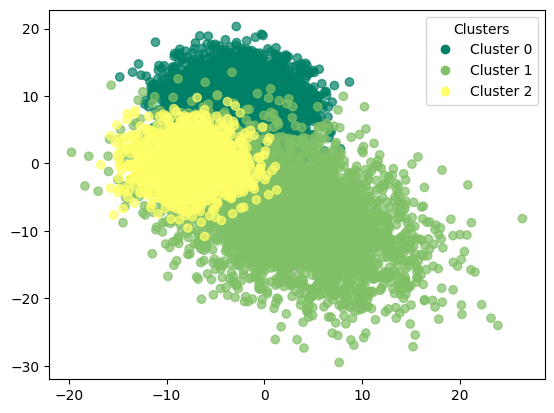

In [280]:
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [281]:
print(confusion_matrix(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

[[5000    0    0]
 [   0 3499    1]
 [   0    0 1500]]


In [282]:
print(classification_report(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [283]:
adjusted_rand_score(df_umap_gmm['target'],df_umap_gmm['gmm_umap'])

0.9997907792130399

In [284]:
normalized_mutual_info_score(df_umap_gmm['target'],df_umap_gmm['gmm_umap'])

0.9991250976470251

In [285]:
silhouette_score(df_umap_gmm.drop(columns=['target','gmm_umap']).values,df_umap_gmm['gmm_umap'])

0.40715957673905095

## pam

In [286]:
initial_medoids = np.random.choice(len(X_values),3,replace=False)

In [287]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [288]:
pam = kmedoids(X_values,initial_medoids,metric=metric)

In [289]:
pam.process()

In [290]:
clusters = pam.get_clusters()

In [291]:
medoids = pam.get_medoids()

In [292]:
labels = np.zeros(len(X_values))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [293]:
df_pam = corr_dataset.copy()

In [294]:
df_pam['pam'] = labels

In [295]:
df_pam

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
9995  1.0  
9996  1.0  
9997  1.0  
9998  1.0  
9999  1.0  

[10000 rows x 22 columns]

In [296]:
y_true = df_pam['target'].values  
y_kmeans = df_pam['pam'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam['pam'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam['pam'] == y_true))

accuracy before: 0.5251
accuracy after: 0.9748


In [297]:
df_pam

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
9995    2  
9996    2  
9997    2  
9998    2  
9999    2  

[10000 rows x 22 columns]

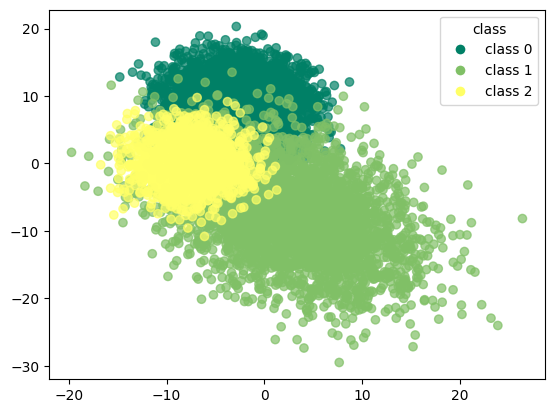

In [298]:
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

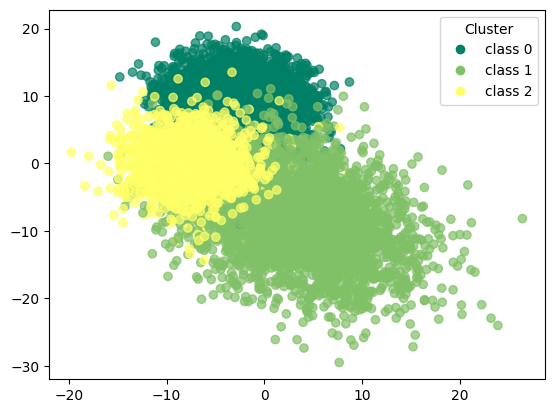

In [299]:
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [300]:
print(confusion_matrix(df_pam['target'],df_pam['pam']))

[[5000    0    0]
 [   1 3248  251]
 [   0    0 1500]]


In [301]:
print(classification_report(df_pam['target'],df_pam['pam']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      0.93      0.96      3500
           2       0.86      1.00      0.92      1500

    accuracy                           0.97     10000
   macro avg       0.95      0.98      0.96     10000
weighted avg       0.98      0.97      0.98     10000



In [302]:
adjusted_rand_score(df_pam['target'],df_pam['pam'])

0.949573616292529

In [303]:
normalized_mutual_info_score(df_pam['target'],df_pam['pam'])

0.9185584398476001

In [304]:
silhouette_score(df_pam.drop(columns=['target','pam']).values,df_pam['pam'])

0.41154801636807514

### pam with pca

In [305]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [306]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [307]:
pam_pca = kmedoids(X_pca,initial_medoids,metric=metric)

In [308]:
pam_pca.process()

In [309]:
clusters = pam_pca.get_clusters()

In [310]:
medoids = pam_pca.get_medoids()

In [311]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [312]:
df_pam_pca = corr_dataset.copy()

In [313]:
df_pam_pca['pam_pca'] = labels

In [314]:
df_pam_pca

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam_pca  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
9995      2.0  
9996      2.0  
9997      2.0  
9998      2.0  
9999      2.0  

[10000 rows x 22 columns]

In [315]:
y_true = df_pam_pca['target'].values  
y_kmeans = df_pam_pca['pam_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_pca['pam_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_pca['pam_pca'] == y_true))

accuracy before: 0.9912
accuracy after: 0.9912


In [316]:
df_pam_pca

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam_pca  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        2  
9996        2  
9997        2  
9998        2  
9999        2  

[10000 rows x 22 columns]

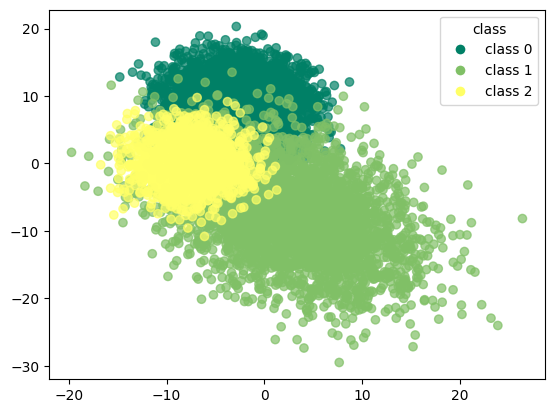

In [317]:
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

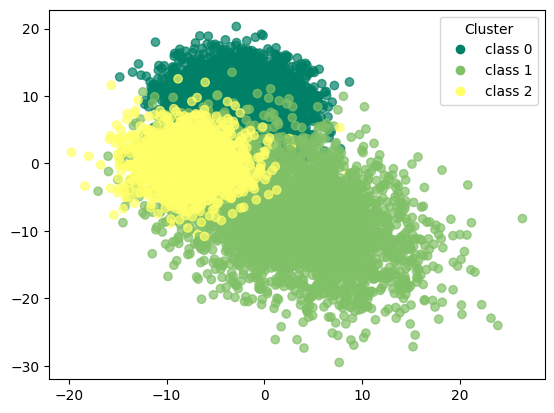

In [318]:
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [319]:
print(confusion_matrix(df_pam_pca['target'],df_pam_pca['pam_pca']))

[[5000    0    0]
 [   0 3412   88]
 [   0    0 1500]]


In [320]:
print(classification_report(df_pam_pca['target'],df_pam_pca['pam_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      0.97      0.99      3500
           2       0.94      1.00      0.97      1500

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [321]:
adjusted_rand_score(df_pam_pca['target'],df_pam_pca['pam_pca'])

0.9818825044743439

In [322]:
normalized_mutual_info_score(df_pam_pca['target'],df_pam_pca['pam_pca'])

0.9625249197406855

In [323]:
silhouette_score(df_pam_pca.drop(columns=['target','pam_pca']).values,df_pam_pca['pam_pca'])

0.4099260656537339

### pam with t-SNE

In [324]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [325]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [326]:
pam_tsne = kmedoids(X_tsne,initial_medoids,metric=metric)

In [327]:
pam_tsne.process()

In [328]:
clusters = pam_tsne.get_clusters()

In [329]:
medoids = pam_tsne.get_medoids()

In [330]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [331]:
df_pam_tsne = corr_dataset.copy()

In [332]:
df_pam_tsne['pam_tsne'] = labels

In [333]:
df_pam_tsne

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam_tsne  
0          2.0  
1          0.0  
2          2.0  
3          2.0  
4          2.0  
...        ...  
9995       0.0  
9996       0.0  
9997       0.0  
9998       0.0  
9999       0.0  

[10000 rows x 22 columns]

In [334]:
y_true = df_pam_tsne['target'].values  
y_kmeans = df_pam_tsne['pam_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_tsne['pam_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_tsne['pam_tsne'] == y_true))

accuracy before: 0.3689
accuracy after: 0.8967


In [335]:
df_pam_tsne

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam_tsne  
0            0  
1            2  
2            0  
3            0  
4            0  
...        ...  
9995         2  
9996         2  
9997         2  
9998         2  
9999         2  

[10000 rows x 22 columns]

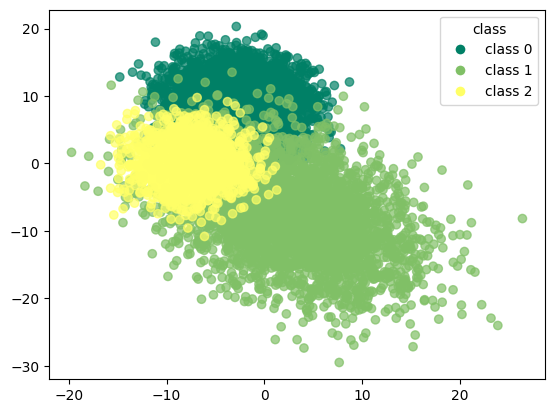

In [336]:
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

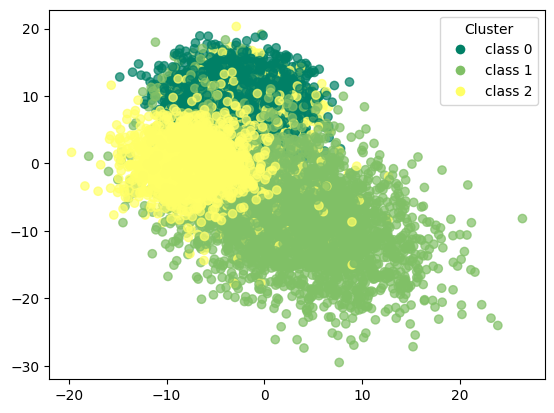

In [337]:
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [338]:
print(confusion_matrix(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

[[4277  224  499]
 [   0 3190  310]
 [   0    0 1500]]


In [339]:
print(classification_report(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      5000
           1       0.93      0.91      0.92      3500
           2       0.65      1.00      0.79      1500

    accuracy                           0.90     10000
   macro avg       0.86      0.92      0.88     10000
weighted avg       0.92      0.90      0.90     10000



In [340]:
adjusted_rand_score(df_pam_tsne['target'],df_pam_tsne['pam_tsne'])

0.7323847104959353

In [341]:
normalized_mutual_info_score(df_pam_tsne['target'],df_pam_tsne['pam_tsne'])

0.6893595617402131

In [342]:
silhouette_score(df_pam_tsne.drop(columns=['target','pam_tsne']).values,df_pam_tsne['pam_tsne'])

0.2906932449982042

### pam with umap

In [343]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [344]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [345]:
pam_umap = kmedoids(X_umap,initial_medoids,metric=metric)

In [346]:
pam_umap.process()

In [347]:
clusters = pam_umap.get_clusters()

In [348]:
medoids = pam_umap.get_medoids()

In [349]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [350]:
df_pam_umap = corr_dataset.copy()

In [351]:
df_pam_umap['pam_umap'] = labels

In [352]:
df_pam_umap

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam_umap  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
...        ...  
9995       0.0  
9996       0.0  
9997       0.0  
9998       0.0  
9999       0.0  

[10000 rows x 22 columns]

In [353]:
y_true = df_pam_umap['target'].values  
y_kmeans = df_pam_umap['pam_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_umap['pam_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_umap['pam_umap'] == y_true))

accuracy before: 0.0
accuracy after: 0.9999


In [354]:
df_pam_umap

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      pam_umap  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
9995         2  
9996         2  
9997         2  
9998         2  
9999         2  

[10000 rows x 22 columns]

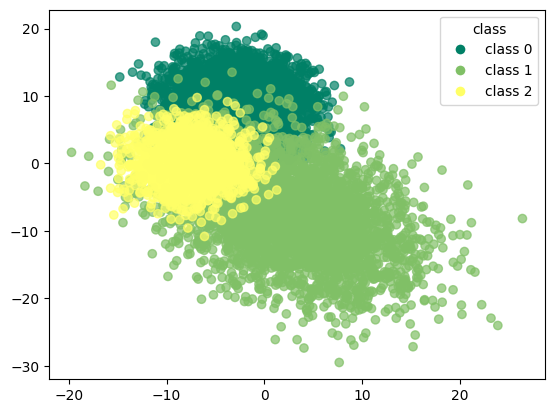

In [355]:
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

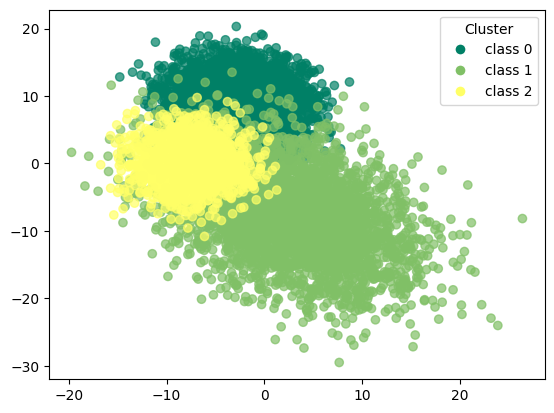

In [356]:
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [357]:
print(confusion_matrix(df_pam_umap['target'],df_pam_umap['pam_umap']))

[[5000    0    0]
 [   0 3499    1]
 [   0    0 1500]]


In [358]:
print(classification_report(df_pam_umap['target'],df_pam_umap['pam_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [359]:
adjusted_rand_score(df_pam_umap['target'],df_pam_umap['pam_umap'])

0.9997907792130399

In [360]:
normalized_mutual_info_score(df_pam_umap['target'],df_pam_umap['pam_umap'])

0.9991250976470251

In [361]:
silhouette_score(df_pam_umap.drop(columns=['target','pam_umap']).values,df_pam_umap['pam_umap'])

0.40715957673905095

## spectral clustering

In [362]:
spectral_clustering = SpectralClustering(n_clusters=3,affinity ='rbf')

In [363]:
spectral_clustering.fit(X_values)

SpectralClustering(n_clusters=3)

In [364]:
df_spectral = corr_dataset.copy()

In [365]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [366]:
df_spectral

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      spectral_clustering  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9995                    2  
9996                    2  
9997                    2  
9998                    2  
9999                    2  

[10000 rows x 22 columns]

In [367]:
y_true = df_spectral['target'].values  
y_spectral = df_spectral['spectral_clustering'].values  

conf_matrix = confusion_matrix(y_true, y_spectral)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_spectral['spectral_clustering'] = np.array([mapping[label] for label in y_spectral])

print("accuracy before:", np.mean(y_spectral == y_true))
print("accuracy after:", np.mean(df_spectral['spectral_clustering'] == y_true))

accuracy before: 0.9997
accuracy after: 0.9997


In [368]:
df_spectral

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      spectral_clustering  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9995                    2  
9996                    2  
9997                    2  
9998                    2  
9999                    2  

[10000 rows x 22 columns]

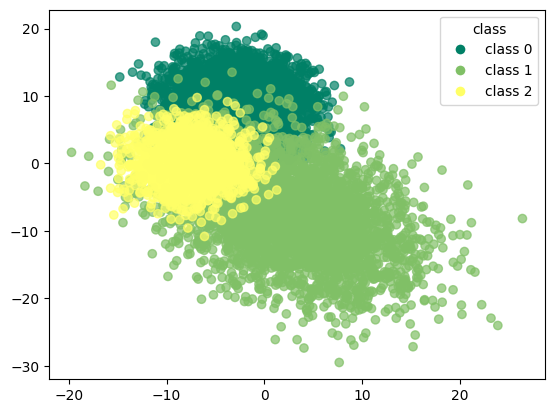

In [369]:
scatter = plt.scatter(df_spectral.iloc[:, 0],df_spectral.iloc[:, 1], 
                      c=df_spectral['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_spectral['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

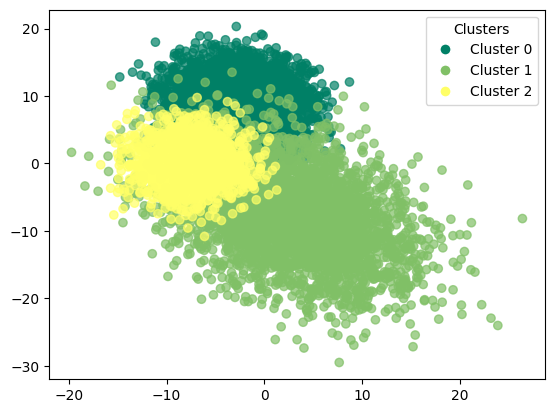

In [370]:
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [371]:
print(confusion_matrix(df_spectral['target'],df_spectral['spectral_clustering']))

[[5000    0    0]
 [   0 3497    3]
 [   0    0 1500]]


In [372]:
print(classification_report(df_spectral['target'],df_spectral['spectral_clustering']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [373]:
adjusted_rand_score(df_spectral['target'],df_spectral['spectral_clustering'])

0.9993725667275963

In [374]:
normalized_mutual_info_score(df_spectral['target'],df_spectral['spectral_clustering'])

0.9977054686584327

In [375]:
silhouette_score(df_spectral.drop(columns=['target','spectral_clustering']).values,df_spectral['spectral_clustering'])

0.4071224539219604

### spectral clustering with pca

In [376]:
spectral_pca = SpectralClustering(n_clusters=3,affinity ='rbf')

In [377]:
spectral_pca.fit(X_pca)

SpectralClustering(n_clusters=3)

In [378]:
df_pca_spectral = corr_dataset.copy()

In [379]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [380]:
df_pca_spectral

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      spectral_pca  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
9995             2  
9996             2  
9997             2  
9998             2  
9999             2  

[10000 rows x 22 columns]

In [381]:
y_true = df_pca_spectral['target'].values  
y_spectral_pca = df_pca_spectral['spectral_pca'].values  

conf_matrix = confusion_matrix(y_true, y_spectral_pca)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_spectral['spectral_pca'] = np.array([mapping[label] for label in y_spectral_pca])

print("accuracy before:", np.mean(y_spectral_pca == y_true))
print("accuracy after:", np.mean(df_pca_spectral['spectral_pca'] == y_true))

accuracy before: 0.9997
accuracy after: 0.9997


In [382]:
df_pca_spectral

vab_1      vab_2      vab_3      vab_4      vab_5     vab_6  \
0    -2.447071   9.067838   4.963225   4.753844 -11.538494 -7.281948   
1    -2.157444  12.057272   4.221529   7.005036  -4.394780 -0.915753   
2     0.254694  11.606127   4.037294   1.398882 -12.811461 -9.510800   
3    -3.102748  14.056239  -0.604337  -1.210674 -10.923828 -7.984660   
4    -0.673976  11.742422  11.161148   2.872315  -7.051826 -8.574435   
...        ...        ...        ...        ...        ...       ...   
9995 -8.376762   0.378775 -12.850864  11.613997  -6.330064  1.501732   
9996 -4.518274  -0.612155  -4.226705   4.611314  -1.389181  5.074534   
9997 -9.020929   2.213659 -10.499229  10.249491  -6.654928  3.652900   
9998 -4.396421  -2.327710  -9.699919   6.253528  -2.254682  7.030431   
9999 -7.332387   4.276716 -11.330677   8.422379 -10.386429  0.206042   

         vab_7     vab_8     vab_9     vab_10  ...    vab_13    vab_14  \
0    -9.681095  8.976868  5.850745   2.738370  ...  8.857610 -3.582936   
1    -6.537101  7.721109  0.792942  10.815044  ...  5.453240 -6.073380   
2    -9.646157  8.110650  0.919857   9.483313  ...  6.609828 -8.373270   
3    -5.758030  1.033838 -1.041019   6.091147  ...  9.407202 -0.287553   
4    -6.615850  5.314052  5.825007   0.733887  ...  3.077253 -9.004935   
...        ...       ...       ...        ...  ...       ...       ...   
9995 -2.081721  2.898086  3.451889  -4.799239  ...  7.673091  8.961893   
9996 -4.307357 -3.489903  7.975323  -6.697885  ...  7.746132  0.425229   
9997 -1.827792  5.803480  3.119384  -5.109602  ...  9.142960  7.585068   
9998 -5.791254  0.591293  0.633621  -8.321554  ...  8.014670  9.690668   
9999 -9.343196  1.651641  5.569608  -2.070038  ...  8.982281  5.295816   

        vab_15     vab_16    vab_17     vab_18     vab_19    vab_20  target  \
0    -9.047032  -5.364948  0.979564   3.349944  -4.259870  0.331444       0   
1    -6.890887  -3.775606 -6.843887   1.167157  -0.360806 -3.162936       0   
2     0.140109  -6.497214 -4.231614   2.589727  -2.548649 -2.723338       0   
3    -5.435675  -7.393385 -5.138560  -0.963172  -0.740034 -3.244719       0   
4    -8.984782  -2.856982 -7.597038  -0.830523  -0.496867  1.149451       0   
...        ...        ...       ...        ...        ...       ...     ...   
9995  4.456574   8.206148 -7.006022  -2.327475  -8.703338 -2.771761       2   
9996  7.000950   3.060662 -8.905005  -5.895011 -10.909054 -0.723848       2   
9997  5.661890  11.814426 -8.928507  -3.000343 -10.042670  1.513068       2   
9998  2.159105   9.200750 -9.462143  -5.598736  -5.645028  2.277251       2   
9999  2.392697   6.434159 -6.266143 -11.494985 -11.565645 -5.992116       2   

      spectral_pca  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
9995             2  
9996             2  
9997             2  
9998             2  
9999             2  

[10000 rows x 22 columns]

In [383]:
print(confusion_matrix(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

[[5000    0    0]
 [   0 3497    3]
 [   0    0 1500]]


In [384]:
print(classification_report(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [385]:
adjusted_rand_score(df_pca_spectral['target'],df_pca_spectral['spectral_pca'])

0.9993725667275963

In [386]:
normalized_mutual_info_score(df_pca_spectral['target'],df_pca_spectral['spectral_pca'])

0.9977054686584327

In [387]:
silhouette_score(df_pca_spectral.drop(columns=['target','spectral_pca']).values,df_pca_spectral['spectral_pca'])

0.4071520249831086

### spectral clustering with t-SNE

In [388]:
spectral_tsne = SpectralClustering(n_clusters=3,affinity ='rbf')

In [ ]:
spectral_tsne.fit(X_tsne)

In [ ]:
df_tsne_spectral = corr_dataset.copy()

In [ ]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [ ]:
df_tsne_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_tsne  
0               2  
1               2  
2               2  
3               2  
4               2  
...           ...  
9994            1  
9995            1  
9996            1  
9997            1  
9998            1  

[9999 rows x 22 columns]

In [ ]:
y_true = df_tsne_spectral['target'].values  
y_spectral_tsne = df_tsne_spectral['spectral_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_spectral_tsne)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_spectral['spectral_tsne'] = np.array([mapping[label] for label in y_spectral_tsne])

print("accuracy before:", np.mean(y_spectral_tsne == y_true))
print("accuracy after:", np.mean(df_tsne_spectral['spectral_tsne'] == y_true))

accuracy before: 0.0033003300330033004
accuracy after: 0.9964996499649965


In [ ]:
df_tsne_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_tsne  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9994            2  
9995            2  
9996            2  
9997            2  
9998            2  

[9999 rows x 22 columns]

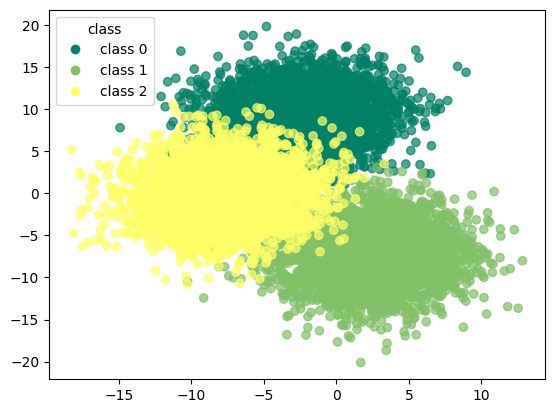

In [ ]:
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_spectral['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

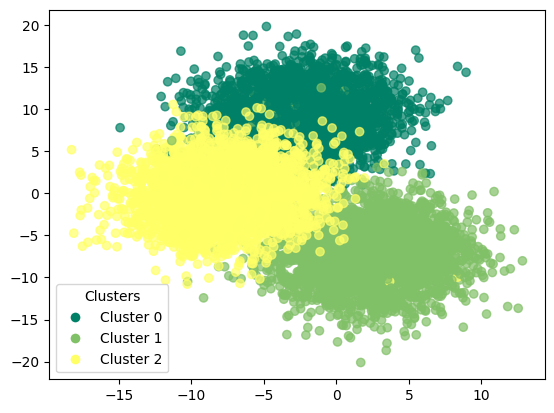

In [ ]:
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

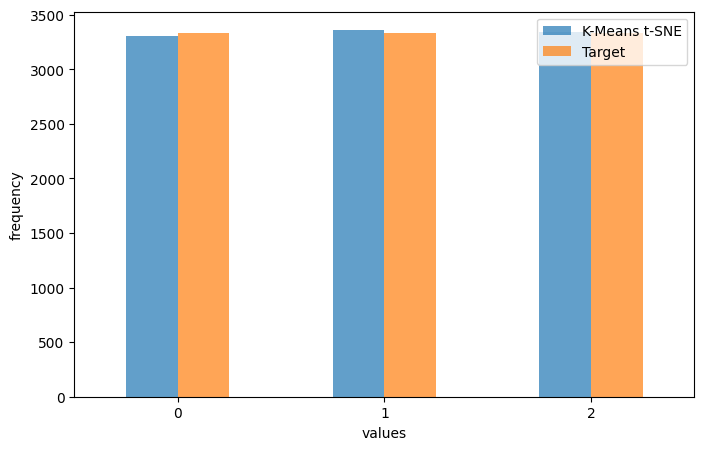

In [ ]:
counts_kmeans = df_tsne_spectral['spectral_tsne'].value_counts().sort_index()
counts_target = df_tsne_spectral['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'Spectral Clustering t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["Spectral Clustering T-sne", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [ ]:
print(confusion_matrix(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne']))

[[3303   29    1]
 [   0 3329    4]
 [   0    1 3332]]


In [ ]:
print(classification_report(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
adjusted_rand_score(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne'])

0.4287245621518938

In [ ]:
normalized_mutual_info_score(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne'])

0.7692189705956035

In [ ]:
silhouette_score(df_tsne_spectral.drop(columns=['target','spectral_tsne']).values,df_tsne_spectral['spectral_tsne'])

0.41501469842079386

### spectral clustering with umap

In [ ]:
spectral_umap = SpectralClustering(n_clusters=3,affinity ='rbf')

In [ ]:
spectral_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_umap_spectral = corr_dataset.copy()

In [ ]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [ ]:
df_umap_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_umap  
0               2  
1               2  
2               2  
3               2  
4               2  
...           ...  
9994            1  
9995            1  
9996            1  
9997            1  
9998            1  

[9999 rows x 22 columns]

In [ ]:
y_true = df_umap_spectral['target'].values  
y_spectral = df_umap_spectral['spectral_umap'].values  

conf_matrix = confusion_matrix(y_true, y_spectral)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_spectral['spectral_umap'] = np.array([mapping[label] for label in y_spectral])

print("accuracy before:", np.mean(y_spectral == y_true))
print("accuracy after:", np.mean(df_umap_spectral['spectral_umap'] == y_true))

accuracy before: 0.0
accuracy after: 1.0


In [ ]:
df_umap_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9994            2  
9995            2  
9996            2  
9997            2  
9998            2  

[9999 rows x 22 columns]

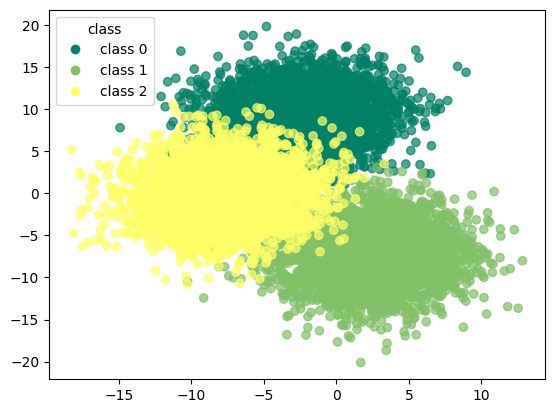

In [ ]:
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_spectral['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

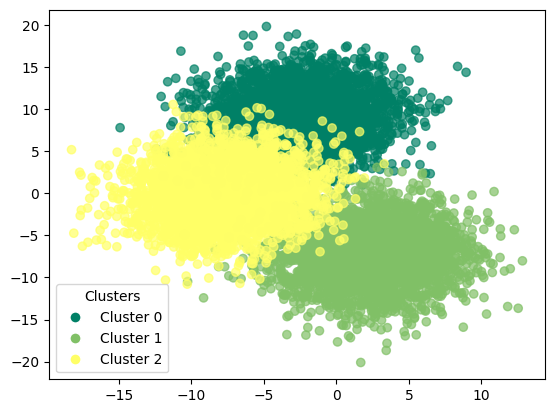

In [ ]:
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [ ]:
print(confusion_matrix(df_umap_spectral['target'],df_umap_spectral['spectral_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_umap_spectral['target'],df_umap_spectral['spectral_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
adjusted_rand_score(df_umap_spectral['target'],df_umap_spectral['spectral_umap'])

0.4287245621518938

In [ ]:
normalized_mutual_info_score(df_umap_spectral['target'],df_umap_spectral['spectral_umap'])

0.7692189705956035

In [ ]:
silhouette_score(df_umap_spectral.drop(columns=['target','spectral_umap']).values,df_umap_spectral['spectral_umap'])

0.41501469842079386

# overall results k-means

## basic

In [ ]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


## + pca

In [ ]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68      3333
           1       0.50      1.00      0.67      3333
           2       0.00      0.00      0.00      3333

    accuracy                           0.50      9999
   macro avg       0.50      0.50      0.45      9999
weighted avg       0.50      0.50      0.45      9999



In [ ]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[1708    0 1625]
 [   0 3333    0]
 [   0 3333    0]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

[[3303   29    1]
 [   0 3329    4]
 [   0    1 3332]]


## + UMAP

In [ ]:
print(classification_report(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


# overall results trimmed k-means

## basic

In [ ]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3001
           1       1.00      1.00      1.00      2968
           2       1.00      1.00      1.00      3030

    accuracy                           1.00      8999
   macro avg       1.00      1.00      1.00      8999
weighted avg       1.00      1.00      1.00      8999



In [ ]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[3001    0    0]
 [   0 2968    0]
 [   0    0 3030]]


## + pca

In [ ]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3001
           1       0.94      0.89      0.91      2968
           2       1.00      0.95      0.97      3030

    accuracy                           0.94      8999
   macro avg       0.95      0.94      0.94      8999
weighted avg       0.95      0.94      0.94      8999



In [ ]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[3001    0    0]
 [ 331 2637    0]
 [   0  165 2865]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3001
           1       0.97      0.97      0.97      2968
           2       1.00      0.98      0.99      3030

    accuracy                           0.98      8999
   macro avg       0.98      0.98      0.98      8999
weighted avg       0.98      0.98      0.98      8999



In [ ]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

[[2973   27    1]
 [  77 2888    3]
 [   0   62 2968]]


## + UMAP

In [ ]:
print(classification_report(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2903
           1       1.00      1.00      1.00      3102
           2       1.00      1.00      1.00      2994

    accuracy                           1.00      8999
   macro avg       1.00      1.00      1.00      8999
weighted avg       1.00      1.00      1.00      8999



In [ ]:
print(confusion_matrix(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

[[2903    0    0]
 [   0 3102    0]
 [   0    0 2994]]


# overall results dbscan

## basic

In [ ]:
print(classification_report(df_dbscan['target'],df_dbscan['dbscan']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    3333.0
           1       0.00      0.00      0.00    3333.0
           2       0.00      0.00      0.00    3333.0

    accuracy                           0.00    9999.0
   macro avg       0.00      0.00      0.00    9999.0
weighted avg       0.00      0.00      0.00    9999.0



In [ ]:
print(confusion_matrix(df_dbscan['target'],df_dbscan['dbscan']))

[[   0    0    0    0]
 [3333    0    0    0]
 [3333    0    0    0]
 [3333    0    0    0]]


## + pca

In [ ]:
print(classification_report(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.96      0.98      3333
           1       1.00      0.95      0.98      3333
           2       1.00      0.97      0.98      3333

    accuracy                           0.96      9999
   macro avg       0.75      0.72      0.74      9999
weighted avg       1.00      0.96      0.98      9999



In [ ]:
print(confusion_matrix(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

[[   0    0    0    0]
 [ 118 3215    0    0]
 [ 154    0 3179    0]
 [ 108    0    0 3225]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.04      0.08      3333
           1       0.00      0.00      0.00      3333
           2       0.00      0.00      0.00      3333
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00    

In [ ]:
print(confusion_matrix(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

[[   0    0    0 ...    0    0    0]
 [1452  140  133 ...    0    0    0]
 [1379    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


## + UMAP

In [ ]:
print(classification_report(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


# overall results GMM

## basic

In [ ]:
print(classification_report(df_gmm['target'],df_gmm['gmm']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_gmm['target'],df_gmm['gmm']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


## + pca

In [ ]:
print(classification_report(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3333
           1       0.50      1.00      0.67      3333
           2       0.00      0.00      0.00      3333

    accuracy                           0.60      9999
   macro avg       0.50      0.60      0.52      9999
weighted avg       0.50      0.60      0.52      9999



In [ ]:
print(confusion_matrix(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

[[2693    0  640]
 [   0 3333    0]
 [   0 3333    0]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3333
           1       0.99      1.00      0.99      3333
           2       1.00      1.00      1.00      3333

    accuracy                           0.99      9999
   macro avg       0.99      0.99      0.99      9999
weighted avg       0.99      0.99      0.99      9999



In [ ]:
print(confusion_matrix(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

[[3282   44    7]
 [   0 3333    0]
 [   0    5 3328]]


## + UMAP

In [ ]:
print(classification_report(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


# overall results pam

## basic

In [ ]:
print(confusion_matrix(df_pam['target'],df_pam['pam']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam['target'],df_pam['pam']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + pca

In [ ]:
print(confusion_matrix(df_pam_pca['target'],df_pam_pca['pam_pca']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam_pca['target'],df_pam_pca['pam_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + t-SNE

In [ ]:
print(confusion_matrix(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

[[3303   24    6]
 [   0 3320   13]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       0.99      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + umap

In [ ]:
print(confusion_matrix(df_pam_umap['target'],df_pam_umap['pam_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam_umap['target'],df_pam_umap['pam_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



# overall results spectral clustering

## basic

In [ ]:
print(confusion_matrix(df_spectral['target'],df_spectral['spectral_clustering']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_spectral['target'],df_spectral['spectral_clustering']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + pca

In [ ]:
print(confusion_matrix(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + t-SNE

In [ ]:
print(confusion_matrix(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne']))

[[3303   24    6]
 [   0 3320   13]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       0.99      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + umap

In [ ]:
print(confusion_matrix(df_umap_spectral['target'],df_umap_spectral['spectral_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_umap_spectral['target'],df_umap_spectral['spectral_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



# external measures - overall results 

In [ ]:
def evaluate_clustering(X, y_true, y_pred):
    
    scores = {
    "ARI": adjusted_rand_score(y_true, y_pred),
    "NMI": normalized_mutual_info_score(y_true, y_pred),
    "Silhouette": silhouette_score(X, y_pred)
    }   
    
    return scores

## k-means

In [ ]:
scores = evaluate_clustering(df_kmeans.drop(['target','k_means'],axis=1).values, df_kmeans['target'], df_kmeans['k_means'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

ARI: 0.762
NMI: 0.769
Silhouette: 0.415


## k-means + pca

In [ ]:
scores = evaluate_clustering(df_pca_kmeans.drop(['target','kmeans_pca'],axis=1).values, df_pca_kmeans['target'], df_pca_kmeans['kmeans_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

ARI: 0.515
NMI: 0.680
Silhouette: 0.161


## k-means + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_kmeans.drop(['target','kmeans_tsne'],axis=1).values, df_tsne_kmeans['target'], df_tsne_kmeans['kmeans_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## k-means + umap

In [ ]:
scores = evaluate_clustering(df_umap_kmeans.drop(['target','kmeans_umap'],axis=1).values, df_umap_kmeans['target'], df_umap_kmeans['kmeans_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

##  trimmed k-means 

In [ ]:
scores = evaluate_clustering(df_trim_kmeans.drop(['target','trim_kmeans'],axis=1).values, df_trim_kmeans['target'], df_trim_kmeans['trim_kmeans'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## trimmed k-means + pca

In [ ]:
scores = evaluate_clustering(df_pca_trim_kmeans.drop(['target','trim_kmeans_pca'],axis=1).values, df_pca_trim_kmeans['target'], df_pca_trim_kmeans['trim_kmeans_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## trimmed k-means + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_trim_kmeans.drop(['target','trim_kmeans_tsne'],axis=1).values, df_tsne_trim_kmeans['target'], df_tsne_trim_kmeans['trim_kmeans_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## trimmed k-means + umap

In [ ]:
scores = evaluate_clustering(df_umap_trim_kmeans.drop(['target','trim_kmeans_umap'],axis=1).values, df_umap_trim_kmeans['target'], df_umap_trim_kmeans['trim_kmeans_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan

In [ ]:
scores = evaluate_clustering(df_dbscan.drop(['target','dbscan'],axis=1).values, df_dbscan['target'], df_dbscan['dbscan'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan + pca

In [ ]:
scores = evaluate_clustering(df_pca_dbscan.drop(['target','dbscan_pca'],axis=1).values, df_pca_dbscan['target'], df_pca_dbscan['dbscan_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_dbscan.drop(['target','dbscan_tsne'],axis=1).values, df_tsne_dbscan['target'], df_tsne_dbscan['dbscan_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan + umap

In [ ]:
scores = evaluate_clustering(df_umap_dbscan.drop(['target','dbscan_umap'],axis=1).values, df_umap_dbscan['target'], df_umap_dbscan['dbscan_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM

In [ ]:
scores = evaluate_clustering(df_gmm.drop(['target','gmm'],axis=1).values, df_gmm['target'], df_gmm['gmm'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM + pca

In [ ]:
scores = evaluate_clustering(df_pca_gmm.drop(['target','gmm_pca'],axis=1).values, df_pca_gmm['target'], df_pca_gmm['gmm_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_gmm.drop(['target','gmm_tsne'],axis=1).values, df_tsne_gmm['target'], df_tsne_gmm['gmm_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM + umap

In [ ]:
scores = evaluate_clustering(df_umap_gmm.drop(['target','gmm_umap'],axis=1).values, df_umap_gmm['target'], df_umap_gmm['gmm_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pam

In [ ]:
scores = evaluate_clustering(df_pam.drop(['target','pam'],axis=1).values, df_pam['target'], df_pam['pam'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pam + pca

In [ ]:
scores = evaluate_clustering(df_pam_pca.drop(['target','pam_pca'],axis=1).values, df_pam_pca['target'], df_pam_pca['pam_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pam + tsne

In [ ]:
scores = evaluate_clustering(df_pam_tsne.drop(['target','pam_tsne'],axis=1).values, df_pam_tsne['target'], df_pam_tsne['pam_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pca + umap

In [ ]:
scores = evaluate_clustering(df_pam_umap.drop(['target','pam_umap'],axis=1).values, df_pam_umap['target'], df_pam_umap['pam_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering

In [ ]:
scores = evaluate_clustering(df_spectral.drop(['target','spectral_clustering'],axis=1).values, df_spectral['target'], df_spectral['spectral_clustering'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering + pca

In [ ]:
scores = evaluate_clustering(df_pca_spectral.drop(['target','spectral_pca'],axis=1).values, df_pca_spectral['target'], df_pca_spectral['spectral_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_spectral.drop(['target','spectral_tsne'],axis=1).values, df_tsne_spectral['target'], df_tsne_spectral['spectral_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering + umap

In [ ]:
scores = evaluate_clustering(df_umap_spectral.drop(['target','spectral_umap'],axis=1).values, df_umap_spectral['target'], df_umap_spectral['spectral_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")